2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Interior
### Basement
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  


### Floors
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  

### Bathroom
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade

### Rooms
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# Architectural & Structural
MSSubClass: The building class  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
Functional: Home functionality rating  
Foundation: Type of foundation  

#  Exterior
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
### Garage
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
  
WoodDeckSF: Wood deck area in square feet  

OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  

PoolArea: Pool area in square feet  
PoolQC: Pool quality  

Fence: Fence quality  

# Location
MSZoning: The general zoning classification  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
## Land
LandContour: Flatness of the property  
LandSlope: Slope of property  

## Lot
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
LotShape: General shape of property  
LotConfig: Lot configuration  

## Access
Street: Type of road access  
Alley: Type of alley access  
PavedDrive: Paved driveway  

# Utilities
Utilities: Type of utilities available
Heating: Type of heating   
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  

# Miscellaneous
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: Value (in dollars) of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load train data
FILE_TRAIN = './challenge_data/train.csv'
df_train = pd.read_csv(FILE_TRAIN)

# load test data
FILE_TEST = './challenge_data/test.csv'
df_test = pd.read_csv(FILE_TEST)

nrow = df_train.shape[0]

First, we need to check missing value of the data set. Assume that we can remove those variables which have more than 15% missing value, so `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `LotFrontage`. We don't remove `FireplaceQu` because NA value mean there is no fireplace, so it is actually not missing value.

In [3]:
# check missing value with total number and percentage
missing_count = (nrow - df_train.count())
missing_per = (1 - df_train.count()/nrow)
missing = pd.concat([missing_count, missing_per], axis=1, keys=['Total', 'Percent']).sort_values(by='Total', ascending=False)
missing[missing['Total'] > 0]

,Total,Percent
PoolQC,1196,0.996667
MiscFeature,1153,0.960833
Alley,1125,0.937500
Fence,973,0.810833
FireplaceQu,564,0.470000
LotFrontage,210,0.175000
GarageYrBlt,67,0.055833
GarageFinish,67,0.055833
GarageType,67,0.055833
GarageQual,67,0.055833


### Dealing with missing value

In [4]:
# The missing value in garage variables means no garage. So replace NA value with NoGarage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('NA')
    df_test[col] = df_test[col].fillna('NA')
    
# Using 0 for the year value
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(0)

# NA value means no Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('NA')
    df_test[col] = df_test[col].fillna('NA')
    
# Other NA
for col in ('Fence', 'FireplaceQu', 'MiscFeature'):
    df_train[col] = df_train[col].fillna('NA')
    df_test[col] = df_test[col].fillna('NA')


# 1. Descriptive analysis 

Let's take a look at our data and make descriptive analysis to understand the variables and the `SalePrice` which we want to predict.

Besides that, we also try to remove the **OUTLIERS** during investigation. As the outliers are the data points that are outside of the expected reponses, they might heavily affect adversely our data model and cause ineffective feature prediction. However, there are no effecient tool for detect and remove the outliers. In this challenge, we will use the visual method to detect the outliers by draw the bivariate graph between features and the reponse variable.

## 1.1 SalePrice

First, plot the historam of SalePrice with the kernel density estimate. The data is heavily right skewed, so the mean will be larger than the median. The boxplot shows that there are many outliers lying in the right of the historam. 

To make thing more easier, we can transform `SalePrice` using log transform. It help to reduce the value and skewness of data so that the patterns in the data will be more interpretable and meet the assumptions of inferential statistics. The historam and kernel estimation of log transform looks more normal!

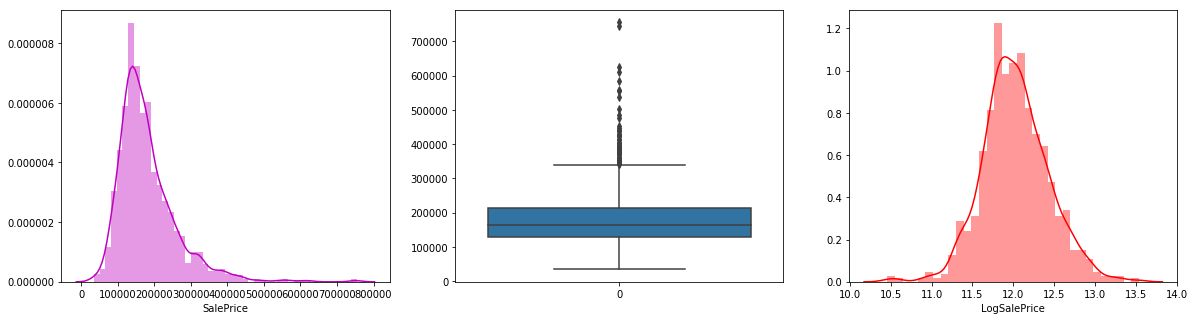

In [5]:
plt.subplots(figsize =(20, 5))

# historam
plt.subplot(1, 3, 1)
sns.distplot(df_train['SalePrice'], color='m');

# boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=df_train['SalePrice']);

# log transformation
df_train["LogSalePrice"] = np.log(df_train['SalePrice'] + 1)
# historam of log
plt.subplot(1, 3, 3)
sns.distplot(df_train['LogSalePrice'], color='r');

In [6]:
# simple statistics
df_train[["SalePrice", "LogSalePrice"]].describe()

,SalePrice,LogSalePrice
count,1200.000000,1200.000000
mean,181414.628333,12.024868
std,81070.908544,0.403554
min,34900.000000,10.460271
25%,129900.000000,11.774528
50%,163700.000000,12.005796
75%,214000.000000,12.273736
max,755000.000000,13.534474


Next, we analysis predictor variables. To make thing easier to analysis, we split the predictor variables into different categories. So in each category, we do analysis for each variable, and evaluate the correlation between them. In this work, we group variables based on the description of them.

## 1.2 Interior

### 1.2.1 Basement
#### BsmtQual
The quality (height) of the basement.  
- Ex: Excellent (100+ inches)	 
- Gd: Good (90-99 inches)  
- TA: Typical (80-89 inches)  
- Fa: Fair (70-79 inches)  
- Po: Poor (<70 inches)  
- None: No Basement  

The graph shows that there are no instance for Poor `BsmtQual`. While Gd, TA and Ex basements are generally more expensive depending on the height of basement, the house with no basement and Fair height basement seems not be differents. Another notice is that the exellent basement has greater deviation than the others.

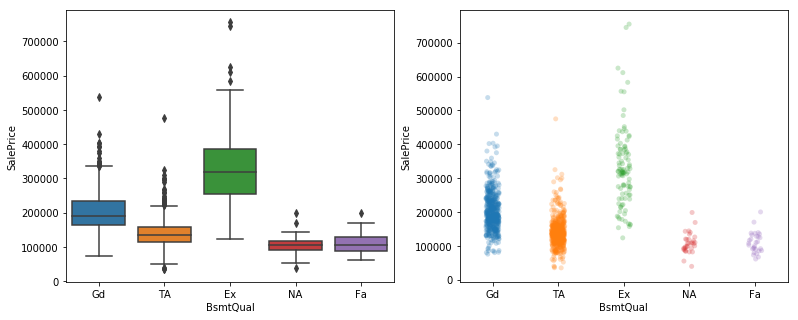

In [7]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtCond [X]
General condition of the basement  
- Ex: Excellent  
- Gd: Good  
- TA: Typical - slight dampness allowed  
- Fa: Fair - dampness or some cracking or settling  
- Po: Poor - Severe cracking, settling, or wetness  
- None: No Basement  

There are no excellent basement in term of general condition. The most popular is Typical condition basement and minimal number of Poor condition basement. There many houses that were priced unexpectedly high in Typical condition basement line.

The feature is generally not quite useful since most of instances valued at `TA` which means `TA` is obvious type and contains little information to learn.

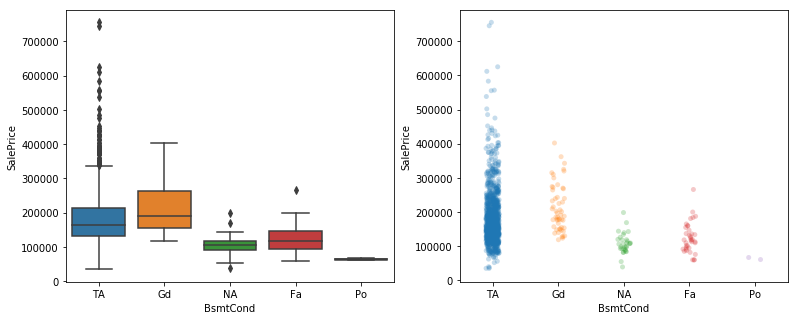

In [8]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtCond", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtExposure
Refers to walkout or garden level walls  
- Gd: Good Exposure
- Av: Average Exposure (split levels or foyers typically score average or above)	
- Mn: Mimimum Exposure
- No: No Exposure
- None: No Basement

As expected, the values of None are minor group as observed in previous features. The most widespread type of basement is no expusure, but the Good Exposure basemenet had little bit higher price than the others.

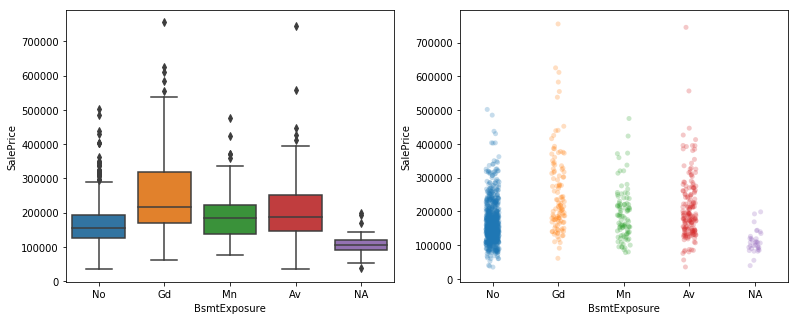

In [9]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtExposure", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtFinType1
Quality of basement finished area  
- GLQ: Good Living Quarters
- ALQ: Average Living Quarters
- BLQ: Below Average Living Quarters	
- Rec: Average Rec Room
- LwQ: Low Quality
- Unf: Unfinshed
- None: No Basement

The figures show that the basement Good type had better price while the others, except no basement, had quite near median values. Indeed, the unfinished basement had higher median. Again the no basement houses were the lowest price group.

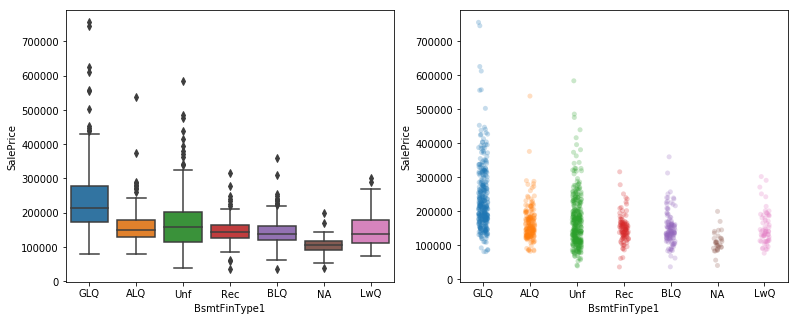

In [10]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType1", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

The graphs show some outliners in the ALQ colummn, however, we believe that this variable is quite important in determine the sale price and may have high correlation with other variables, so we leave them.

#### BsmtFinSF1
Type 1 finished square feet  

The boxplot demonstrate that 50% of houses had smaller than around 750 ft<sup>2</sup>. That means it seems the houses with the basement greater than around 1850 ft<sup>2</sup> were exceptional.

In the scatter plot, except no basement, the sale price of a house was depend on the area of the basement.

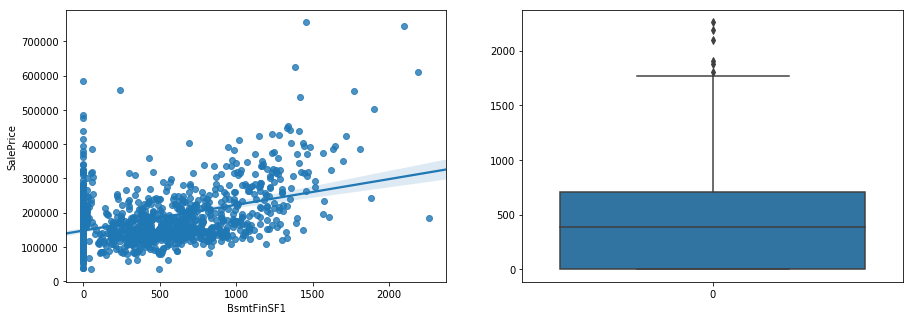

In [11]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="BsmtFinSF1", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['BsmtFinSF1']);

The scatter plot seems to reveal some outliners at the top right. If taking a closer look, there are many sale prices arrange along the 0 zero value, so it is hard to say that the candidate outliers are actual outliers or just because this variable is not independent to the other variables.

#### BsmtFinType2 [X]
Quality of second finished area (if present)  
- GLQ: Good Living Quarters
- ALQ: Average Living Quarters
- BLQ: Below Average Living Quarters	
- Rec: Average Rec Room
- LwQ: Low Quality
- Unf: Unfinshed
- None: No Basement

The figures gives that most of houses had not the second basement and if their had, the price of houses depends on the quality of finished area and the relationship are similar to the `BsmtFinType1`.

Because most of secondary basements are unfinished, the `BsmtFinType2` is not useful.

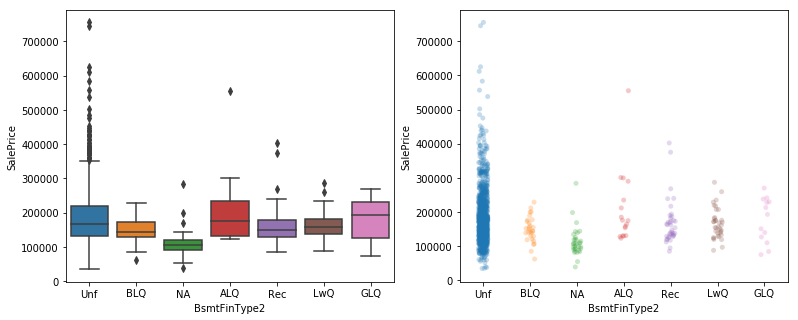

In [12]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtFinSF2 [X]
Type 2 finished square feet  

Since most of houses had no second basement. The boxplot is not meaningful. In the scatter plot, if the houses that had no second basement are excluded, the regression line will slightly go up when the area of the second basement are go up.

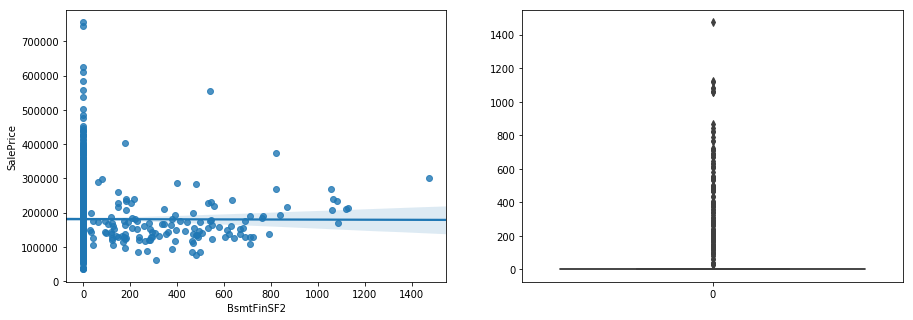

In [13]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="BsmtFinSF2", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['BsmtFinSF2']);

#### BsmtUnfSF
Unfinished square feet of basement area  

The unfinished basement area also had relationship with the sale price of a house. The median of unfinished area were approximate 500 ft<sup>2</sup> and 50% of houses had between 250 and 800 ft<sup>2</sup> of unfinished basement.

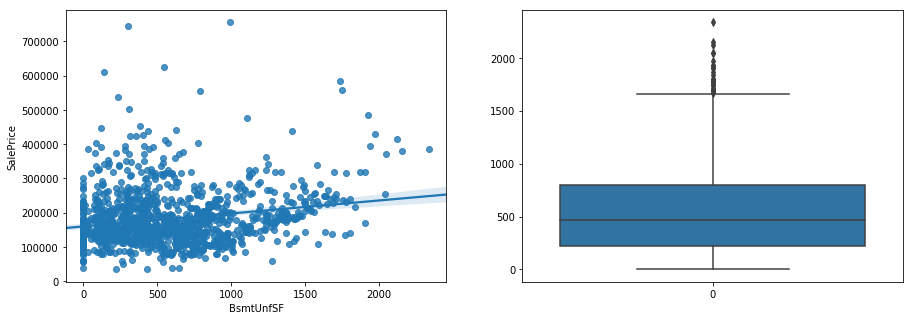

In [14]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="BsmtUnfSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['BsmtUnfSF']);

#### TotalBsmtSF
Total square feet of basement area

The figures shows clear relationship between the area of basement to the sale price. Generally, the larger basement, the higher price.

50% of houses had from 800 to 1300 ft<sup>2</sup> basement and the median is around 1050.

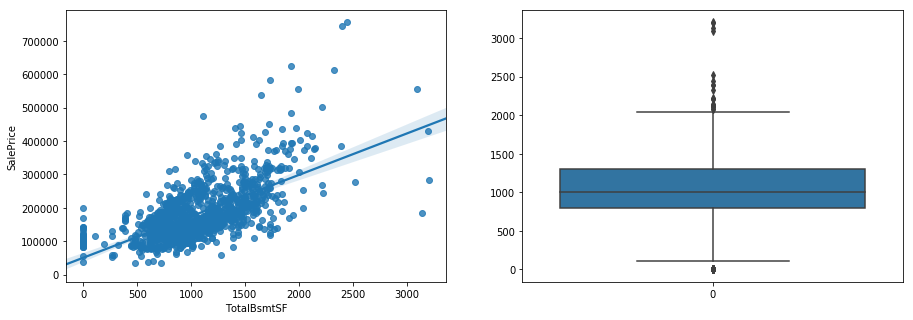

In [15]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['TotalBsmtSF']);

### 1.2.2 Floors
#### 1stFlrSF
First Floor square feet

As the area of the first floor rises, the sale price also increases as well. Notice that there are no house that has zero ft<sup>2</sup>, differened from the other numeric area measures which usually contains a lot of zeros. The median valued at 1150 and the maximum value that can be considered as not an outlier is 2200.

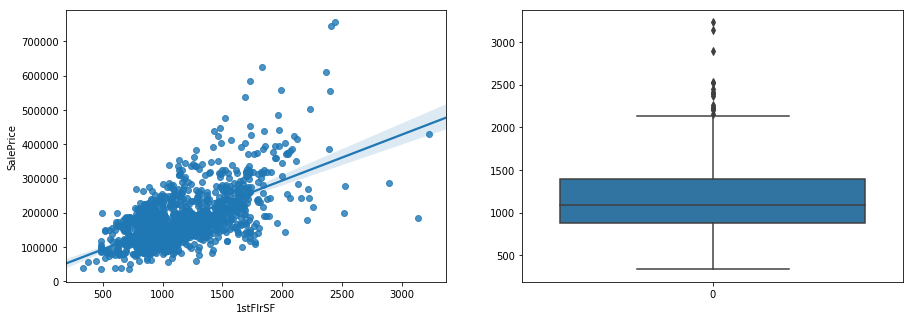

In [16]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="1stFlrSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['1stFlrSF']);

#### 2ndFlrSF [x]
Second floor square feet  

It is obvious that not all houses has a second floor. In general, the price of house goes up when the area of the second floor area increase. However, it seems that the price does not increase linearly, but somewhat exponentially.

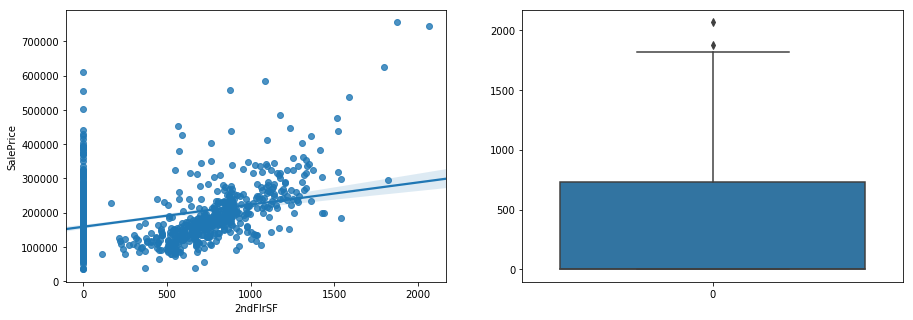

In [17]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="2ndFlrSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['2ndFlrSF']);

#### LowQualFinSF [x]
Low quality finished square feet (all floors)

The regression line are slightly go down when the area of low quality finising increases. It can be explained since that the larger low quality area makes the house less value.

The boxplot show that the houses which has low quality area are exceptional.

Generally, the values are 0 in most of instances while the exceptions seems not to make different, so it is not quite good for learning process.

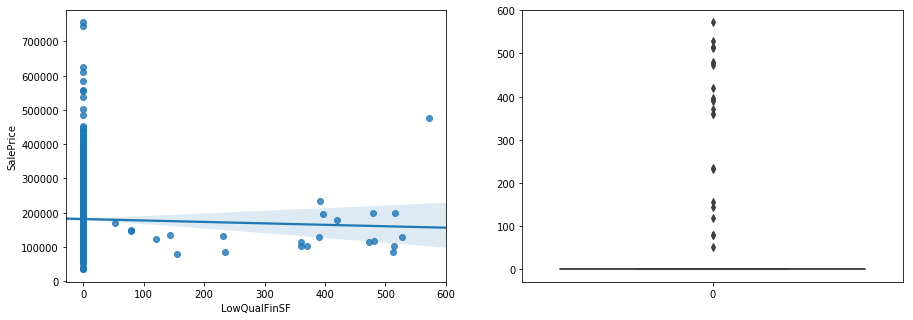

In [18]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="LowQualFinSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['LowQualFinSF']);

#### GrLivArea
Above grade (ground) living area square feet

The graphs suggests that the feature has high positive correlation with Sale Price. It can be noticed that the shape of below scatter plot are quite similar to the `1stFlrSF`.

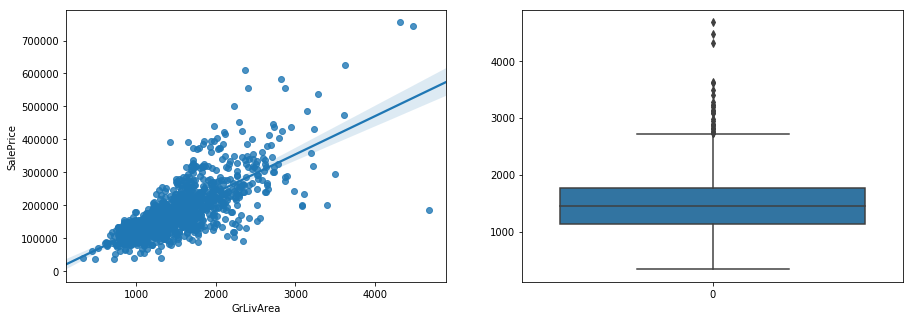

In [19]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['GrLivArea']);

As the scatter plot shows, there are 1 outliers at the bottom right. We expect the higher living area should have high impact on the sale price, but the outlier is an exception.  
Futher more also two more points at the right top of the graph are the candidate of outliers, since these houses has unreasonable high price compare to the growth rate of the price against the living area.  
Generally, we will remove the points whose living area is higher than 4000.

In [20]:
# show the outliers
df_train[df_train['GrLivArea'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NA,NA,0,10,2007,New,Partial,184750,12.126764
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NA,NA,0,1,2007,WD,Normal,755000,13.534474
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,Ex,MnPrv,NA,0,7,2007,WD,Abnorml,745000,13.521141


In [21]:
# remove the outliers
df_train = df_train.drop(df_train[df_train['GrLivArea'] > 4000].index)

### 1.2.3 Bathroom
#### BsmtFullBath
Basement full bathrooms  

Most of basement has zero or one full bathroom. Fews has 2 or 3 full bathrooms. The sale price will be influenced by this feature, but it is not high. The median of zero, one, two ,three full bath room in basement are 160k, 185k, 200k and 195k respectively.

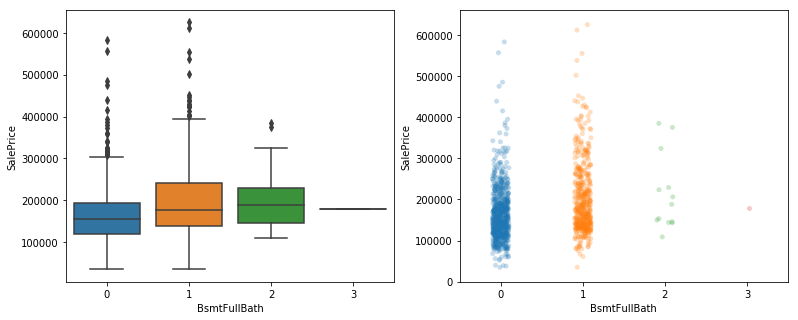

In [22]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFullBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFullBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtHalfBath [X]
Basement half bathrooms

Zero is the popular value in `BsmtHalfBath` feature, because the houses which has no basement also has no bath rooms in basement. Noticeably, the number of half bath in basement e seems has no or minimal effect on sale price of a house.

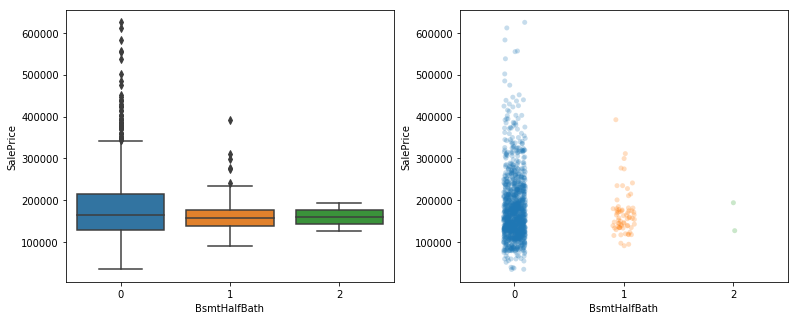

In [23]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtHalfBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtHalfBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### FullBath
Full bathrooms above grade.

It is reasonable that full bathrooms are placed above the basement and they usually has 1 or 2 full bathrooms as shown in below figures. The price of a house is highly influenced by the number of full bathrooms, but no bathroom or one bathroom are not quite different. 

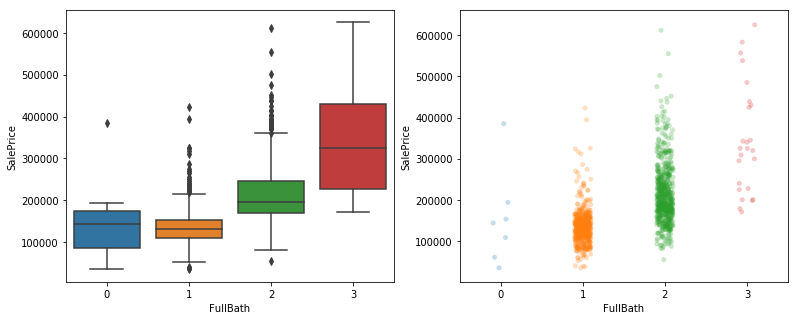

In [24]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="FullBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="FullBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### HalfBath
Half baths above grade

The images illustrates that the most well-liked number of half bath are 0 or 1, while 2 is rare. The houses which has a half bathroom will have higher price, 50k, compared to zero ones.

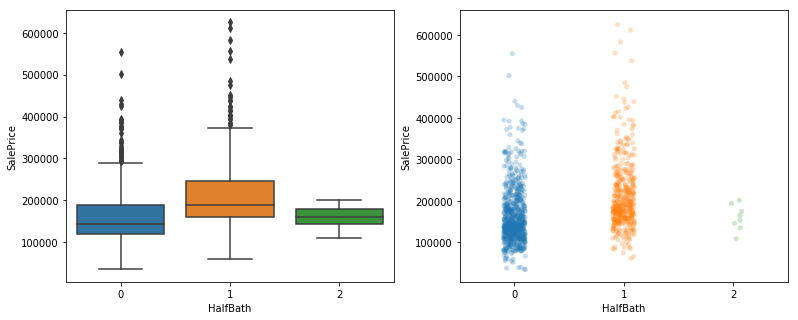

In [25]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HalfBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="HalfBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

### 1.2.4 Rooms
#### BedroomAbvGr
Number of bedrooms above basement level  

The below figures gives out some information. The most popular number of rooms in a house are 2 and 3, but the price are not linear as expected. It may be affected by some other features.

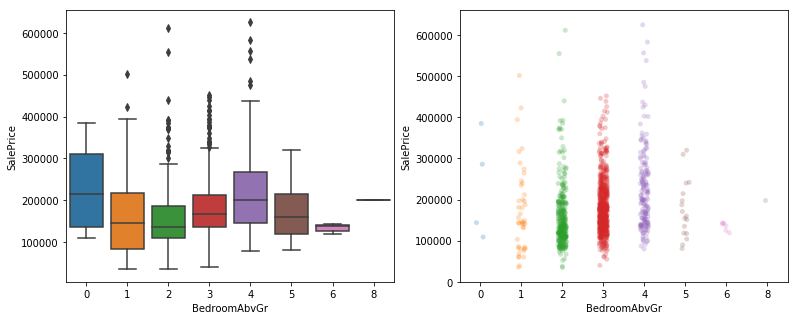

In [26]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BedroomAbvGr", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### KitchenAbvGr [X]
Number of kitchens  

This feature seems not quite useful since the values are nearly always 1. It is quite reasonable since people need only one kitchen in a house, so the feature is not useful.

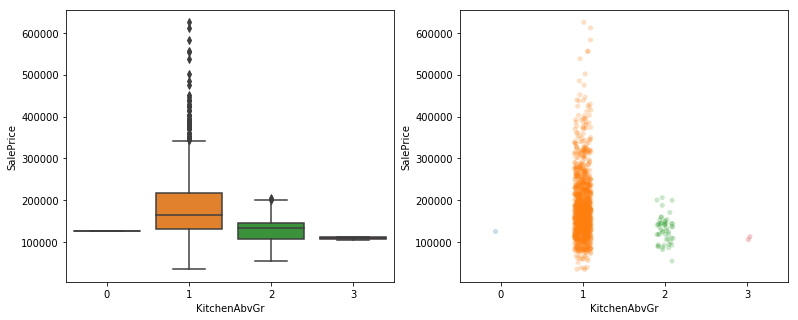

In [27]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenAbvGr", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### KitchenQual
Kitchen quality  
- Ex: Excellent
- Gd: Good
- TA: Typical/Average
- Fa: Fair
- Po: Poor

While the number of kitchen is dominated by single value, the quality of the kitchen stretch out a bit. There are no Poor quality kitchen and the common qualities are Average and Good. The `KitchenQual` probably has high influence on the sale price.

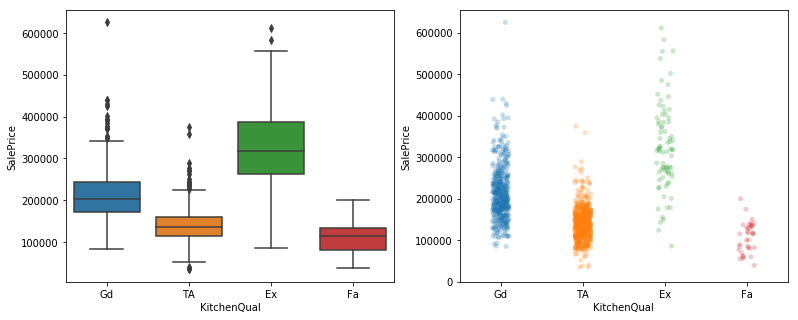

In [28]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

In the right graph, we can see an outlier in the column of `Gd` and we believe this feature could affect more or less on the sale price of a house. Thus, we decide to remove that data point.

In [29]:
# show the outliers
df_train[(df_train['KitchenQual'] == 'Gd') & (df_train['SalePrice'] > 600000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NA,NA,0,7,2006,WD,Normal,625000,13.345509


In [30]:
# remove the outliers
df_train = df_train.drop(df_train[(df_train['KitchenQual'] == 'Gd') & (df_train['SalePrice'] > 600000)].index)

#### TotRmsAbvGrd
Total rooms above grade (does not include bathrooms)

This feature has a good spread on different categorical values and has highly impact on the sale price. We can see that the price of a house increases when the number of rooms increases.

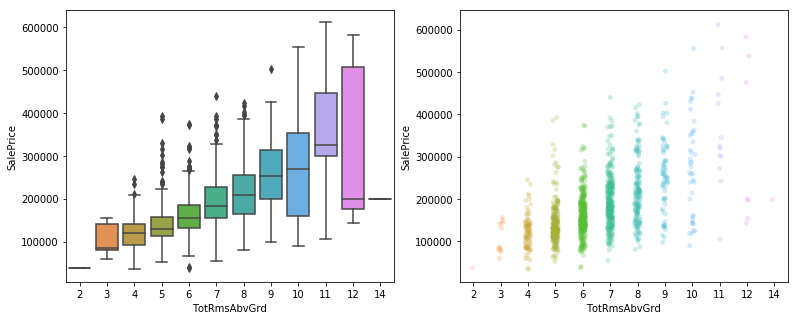

In [31]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="TotRmsAbvGrd", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

## 1.3 Architectural & Structural

#### MSSubClass
The building class
- 20: 1-STORY 1946 & NEWER ALL STYLES
- 30: 1-STORY 1945 & OLDER
- 40: 1-STORY W/FINISHED ATTIC ALL AGES
- 45: 1-1/2 STORY - UNFINISHED ALL AGES
- 50: 1-1/2 STORY FINISHED ALL AGES
- 60: 2-STORY 1946 & NEWER
- 70: 2-STORY 1945 & OLDER
- 75: 2-1/2 STORY ALL AGES
- 80: SPLIT OR MULTI-LEVEL
- 85: SPLIT FOYER
- 90: DUPLEX - ALL STYLES AND AGES
- 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150: 1-1/2 STORY PUD - ALL AGES
- 160: 2-STORY PUD - 1946 & NEWER
- 180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190: 2 FAMILY CONVERSION - ALL STYLES AND AGES

The building class feature spread across different values. Some of them has large variation in price and overlap together, so it should be a medium-low important feature for predicting.

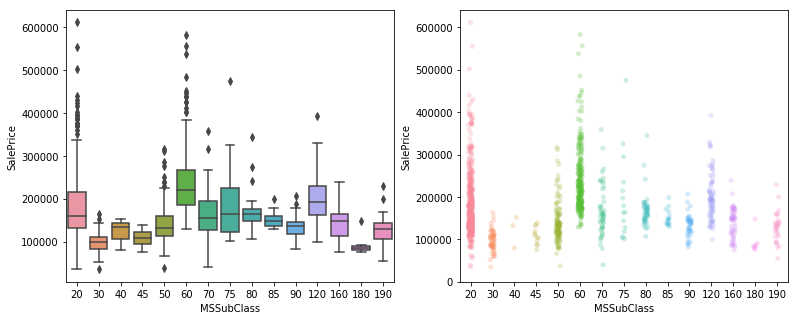

In [32]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="MSSubClass", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BldgType [X]
Type of dwelling
- 1Fam: Single-family Detached: 
- 2FmCon: Two-family Conversion; originally built as one-family dwelling
- Duplx: Duplex
- TwnhsE: Townhouse End Unit
- TwnhsI: Townhouse Inside Unit

The `1Fam` type dominated over other values and the influence on the price is generally not clear.

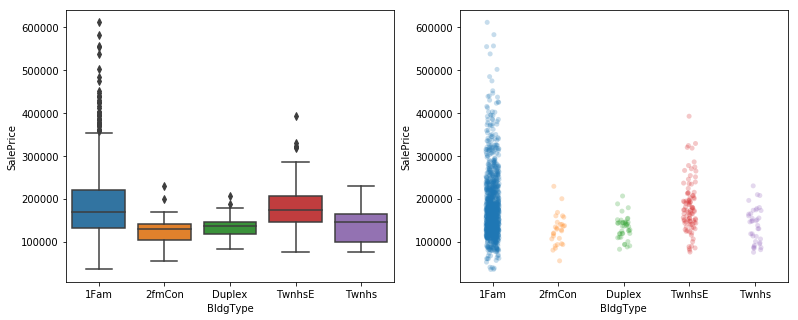

In [33]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BldgType", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BldgType", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### HouseStyle
Style of dwelling
- 1Story: One story
- 1.5Fin: One and one-half story: 2nd level finished
- 1.5Unf: One and one-half story: 2nd level unfinished
- 2Story: Two story
- 2.5Fin: Two and one-half story: 2nd level finished
- 2.5Unf: Two and one-half story: 2nd level unfinished
- SFoyer: Split Foyer
- SLvl: Split Level

Most of the values are 1Story and 2Story. However, they highly overlaps each other and the feature seems to have little impact on the sale price.

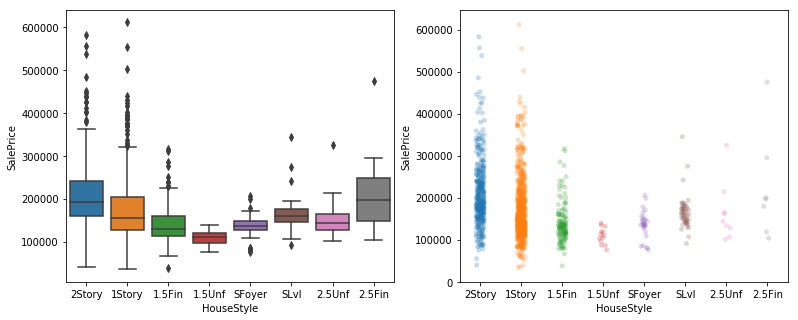

In [34]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="HouseStyle", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### OverallQual
Overall material and finish quality

As the figures show, the sale price increases exponentially when the overall rating of the  material and finish quality increases. The feature can be the key factor in determining the sale price.

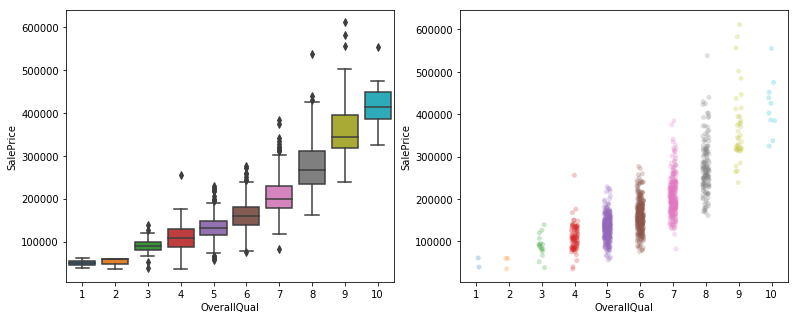

In [35]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### OverallCond
Overall condition rating

High variation in price and the medians are quite near together, the `OverallCond` probably does not make great contribution in pricing a house.

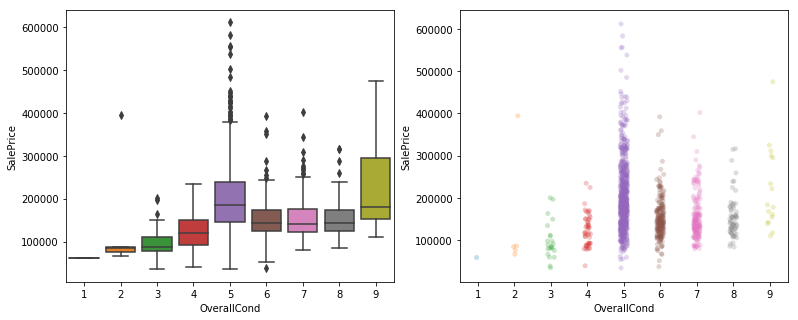

In [36]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallCond", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallCond", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

The graphs show an outlier in column of 2 which the poor overall condition, but the house was sold in uncommon high price. The overall condition of a house has high influence on the price in reality, so we should remove that instance.

In [37]:
# show the outliers
df_train[(df_train['OverallCond'] == 2) & (df_train['SalePrice'] > 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NA,NA,0,6,2010,New,Partial,394432,12.885205


In [38]:
# remove the outliers
df_train = df_train.drop(df_train[(df_train['OverallCond'] == 2) & (df_train['SalePrice'] > 300000)].index)

#### YearBuilt
Original construction date

In overview, the newer house had better sale price.

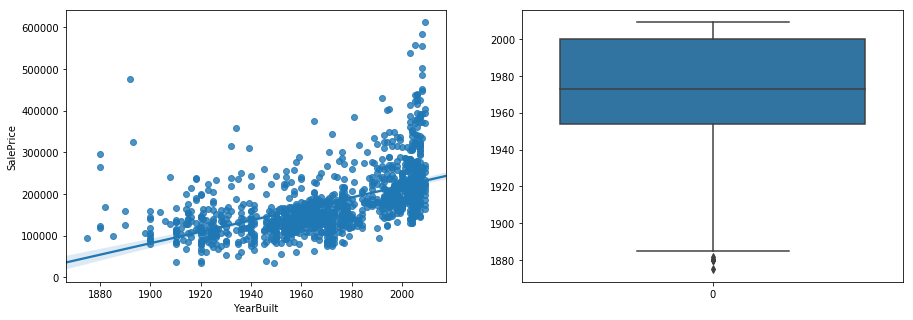

In [39]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="YearBuilt", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['YearBuilt']);

#### YearRemodAdd
Remodel date

Similar to `YearBuilt`, more recent `YearRemodAdd` houses made the sale price higher.

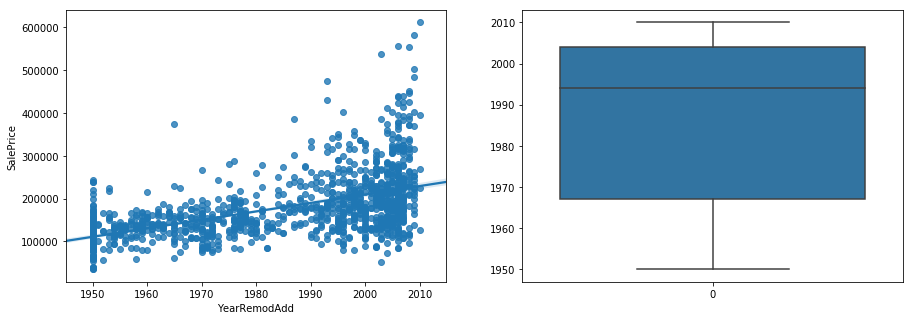

In [40]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="YearRemodAdd", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['YearRemodAdd']);

#### Functional [x]
Home functionality rating

- Typ: Typical Functionality
- Min1: Minor Deductions 1
- Min2: Minor Deductions 2
- Mod: Moderate Deductions
- Maj1: Major Deductions 1
- Maj2: Major Deductions 2
- Sev: Severely Damaged
- Sal: Salvage only

The value of `Typ` dominates other values and the price has no noticeable difference in different functionality rating. Therefore, this feature is not useful.

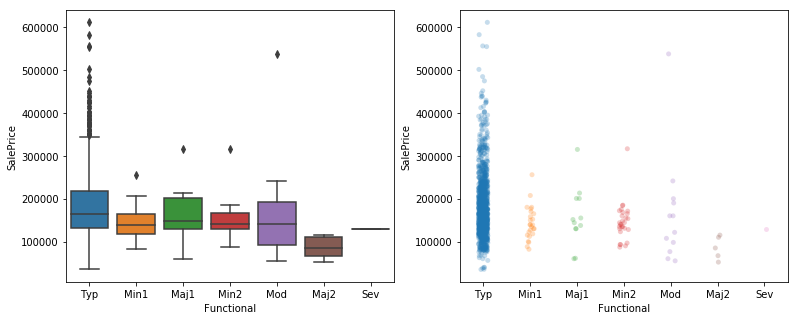

In [41]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Functional", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="Functional", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### Foundation
Type of foundation
- BrkTil: Brick & Tile
- CBlock: Cinder Block
- PConc: Poured Contrete: 
- Slab: Slab
- Stone: Stone
- Wood: Wood

Most of houses made from PConc and CBlock, the other materials are not popular. The PConc can be sold in higher price compared to the CBlock or the others, but it also had high variance.

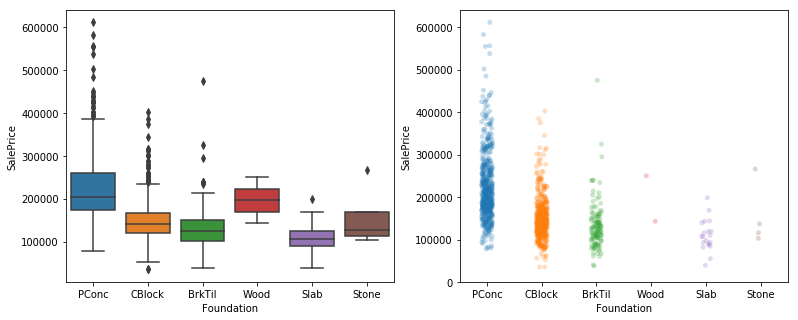

In [42]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Foundation", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="Foundation", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

## 1.4 Garage
#### GarageType
Garage location.  
Using box plot and strip plot to see the difference between garage type. The figures show that `builtin` and `attached` have larger mean than the others and have many extreme values. `Detached` has a small range of value compared to `attached` and `builtin`. The other types have too small number of records to be significant.

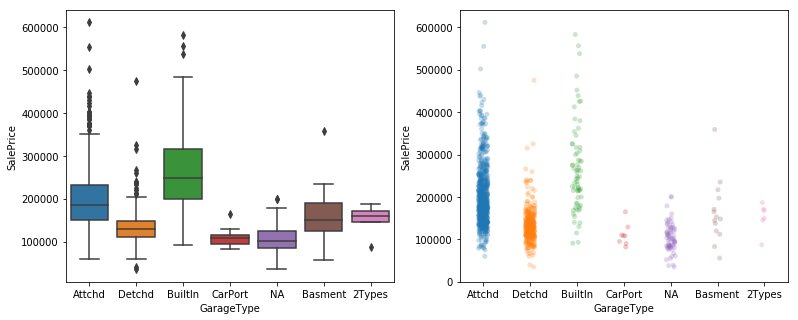

In [43]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageType", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageType", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### GarageYrBlt

Year garage was built.
We can see that there is an increasing trend over years. Not just the mean value, the variance of price also has the increasing trend.

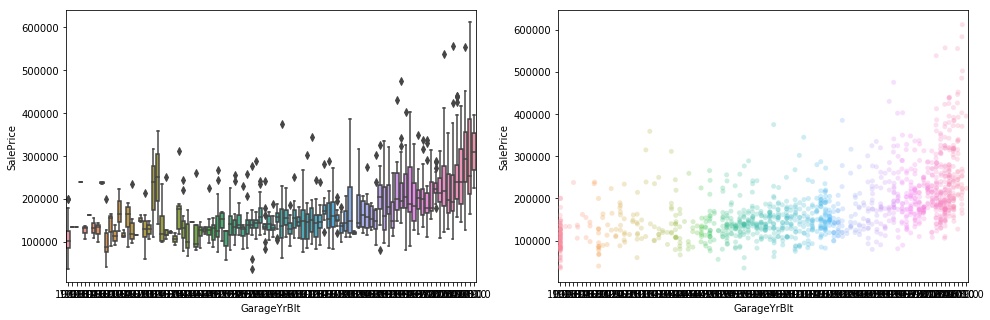

In [44]:
plt.subplots(figsize =(25, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageYrBlt", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### GarageFinish

Interior finish of the garage.  
There is a clear difference between `Finished`, `RoughFinished` with the others.

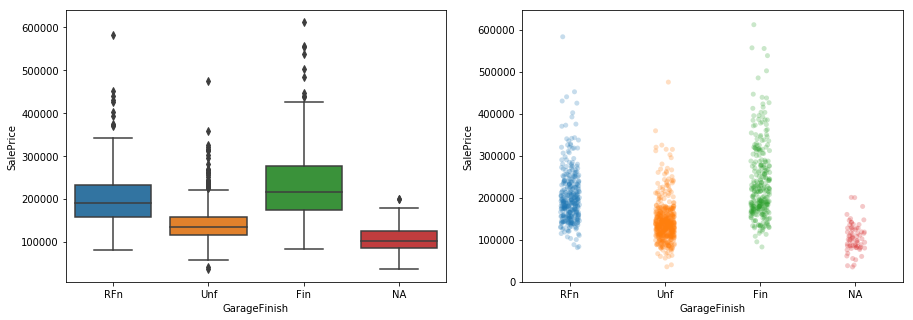

In [45]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageFinish", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageFinish", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### GarageCars

Size of garage in car capacity.  
The figures show that the price increases exponentially when the garage has more capacity.

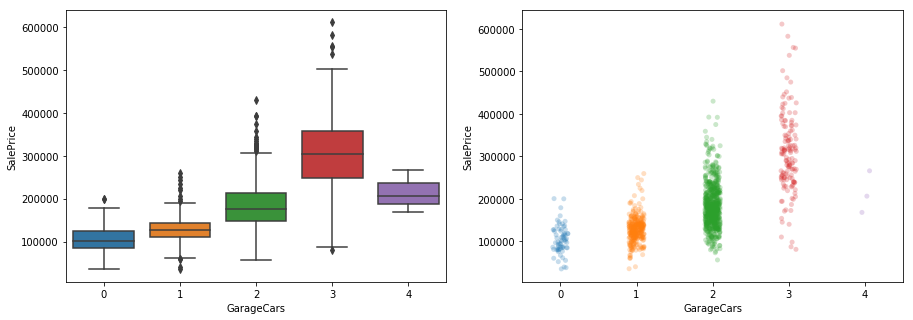

In [46]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageCars", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageCars", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### GarageArea

Size of garage in square feet.
First, look at scatter plot, we can see a correlation between `GarageArea` and `SalePrice`. The box plot shows distribution of `GarageArea`. With both figures, we can remove three outlier on the bottom left of the scatter plot!

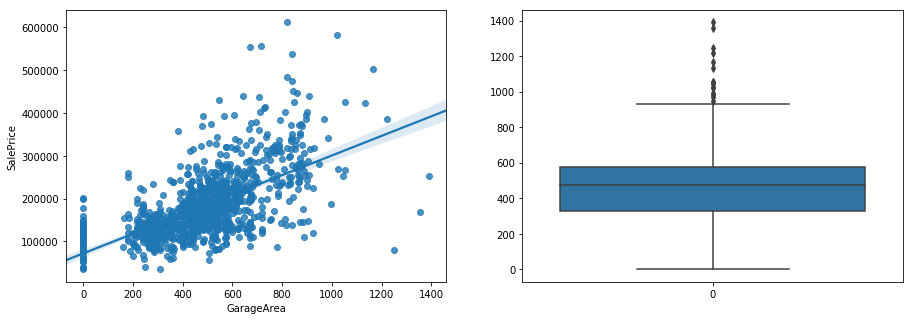

In [47]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="GarageArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['GarageArea']);


#### GarageQual [X]

Garage quality.  
There is not much information in this variable. Most garages are on `Typical/Average` group.

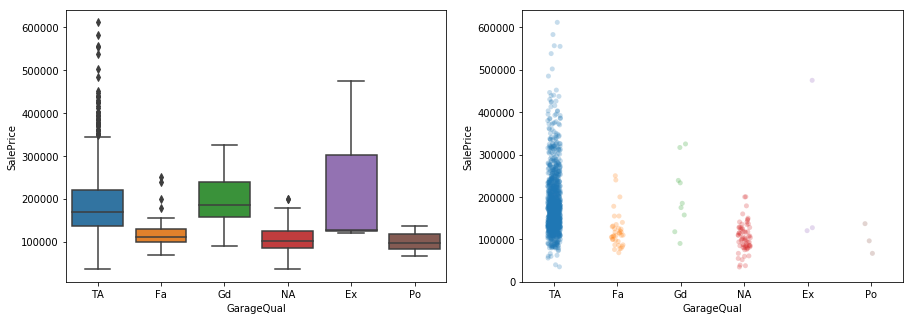

In [48]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageQual", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### GarageCond [X]

Garage condition.
Just like `GarageQual`, the `TA` dominates over other values, so the feature should be discarded.

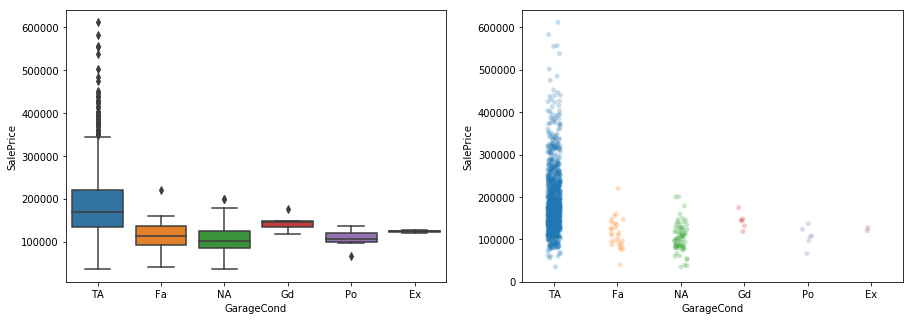

In [49]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageCond", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageCond", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


## 1.5 Wood deck and porch [x]

#### WoodDeckSF

Wood deck area in square feet.  
There is a slightly correlation, but it is neglectable.

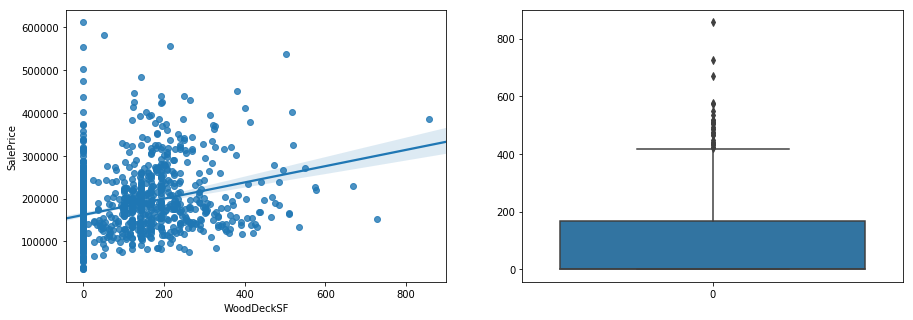

In [50]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="WoodDeckSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['WoodDeckSF']);


#### OpenPorchSF

Open porch area in square feet.

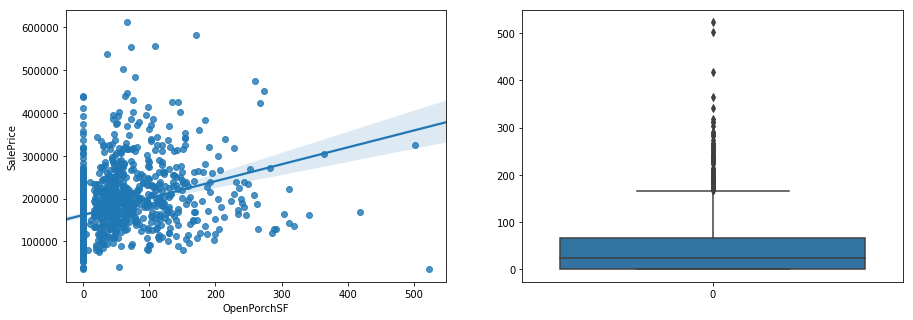

In [51]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="OpenPorchSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['OpenPorchSF']);


#### EnclosedPorch

Enclosed porch area in square feet.  
There are a lot of zeros make the boxplot as a single line with some outliners.

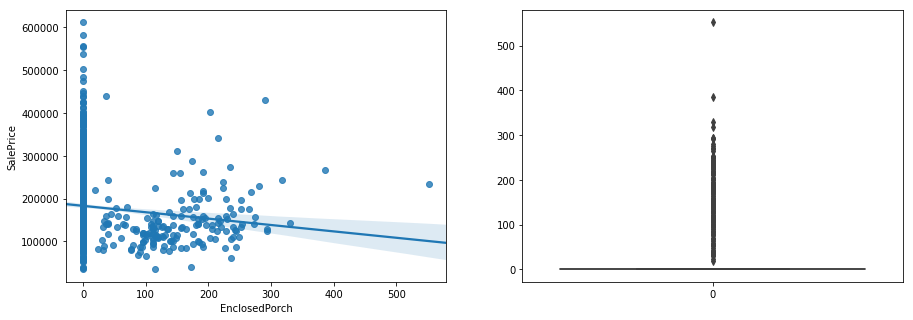

In [52]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="EnclosedPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['EnclosedPorch']);


#### 3SsnPorch

Three season porch area in square feet.  
Similar to the `EnclosedPorch` with more extreme in zeroing the value. The feature contains very little information.

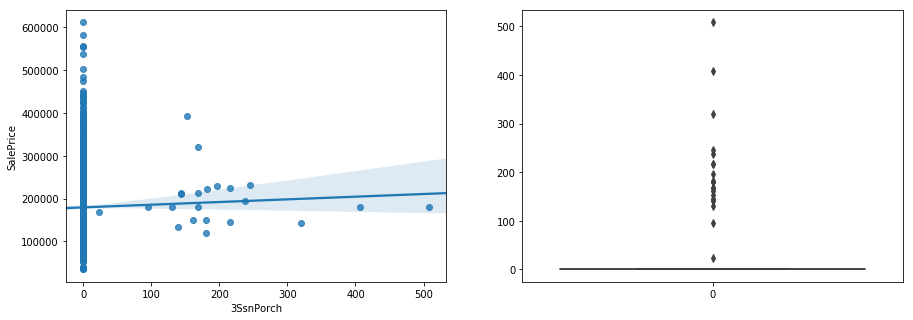

In [53]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="3SsnPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['3SsnPorch']);


#### ScreenPorch

Screen porch area in square feet.  
Similar to the EnclosedPorch. The feature contains very little information.

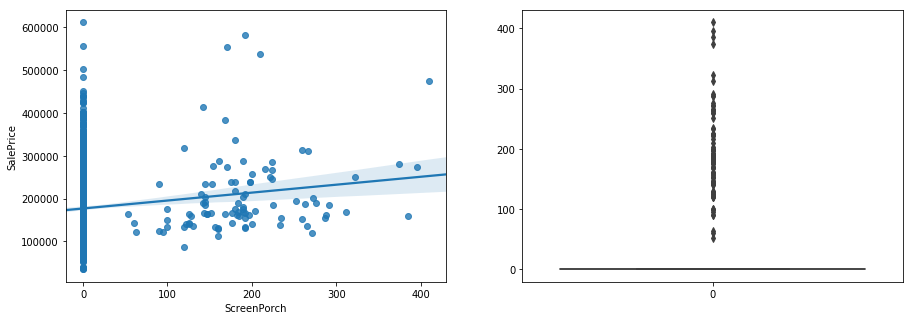

In [54]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="ScreenPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['ScreenPorch']);


The porch variables have little information that we can use, so we can remove these variables.

#### PoolArea [x]

Pool area in square feet.  
Most of houses has no pool, so the feature is not useful for prediction.

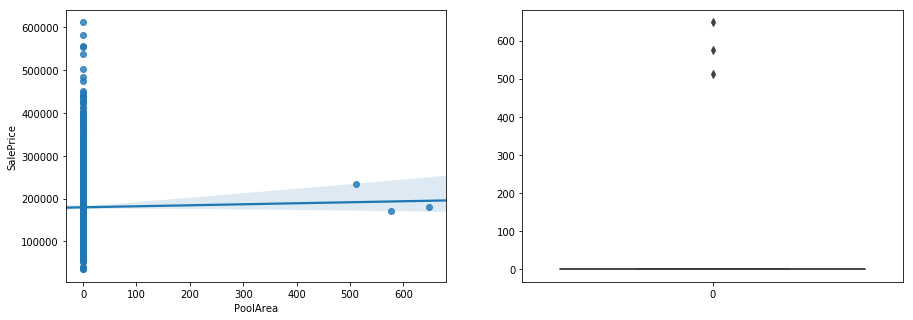

In [55]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="PoolArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['PoolArea']);


#### Fence

Fence quality.  
There is not much difference between fence quality and most of houses has no fence.

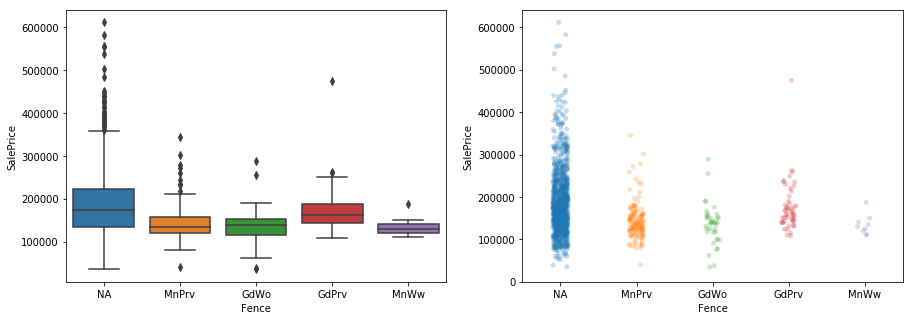

In [56]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Fence", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Fence", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


## 1.6 Location

#### MSZoning

The general zoning classification.

Most of instances concenstrate on the column of `RL` value, but this variable seems to have significant impact on the sale price of a house.

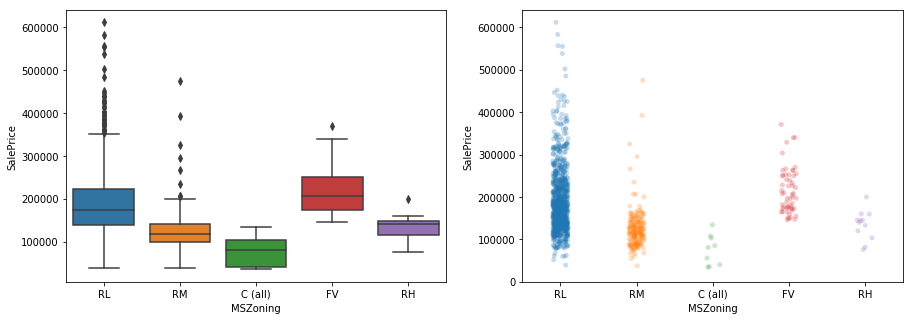

In [57]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="MSZoning", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="MSZoning", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### Neighborhood

Physical locations within Ames city limits.   
Clearly, the neighborhood has crucial contribution toward the sale price. There is difference between groups of neighborhood, so we can keep this variable.

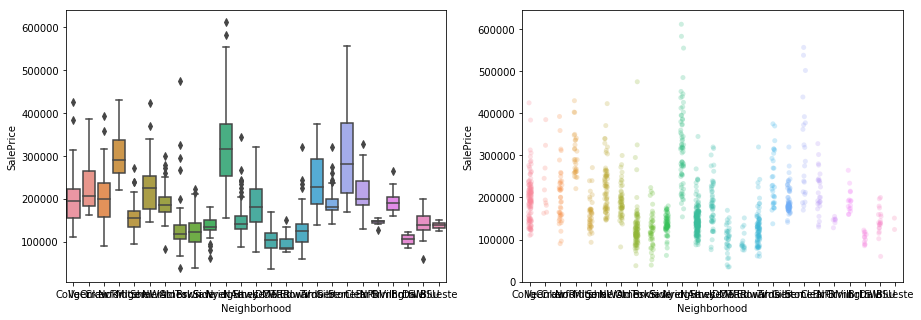

In [58]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Neighborhood", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Neighborhood", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### Condition1 [x]

Proximity to main road or railroad.

The value of `Norm` dominates over this variable while the difference of sale price is unclear between others.

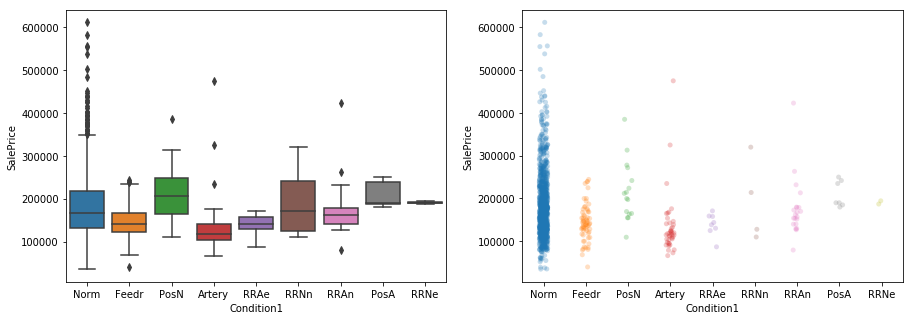

In [59]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Condition1", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Condition1", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### Condition2 [x]

Proximity to main road or railroad (if a second is present).  
This variable contains too little information because `Norm` seems be obvious value.

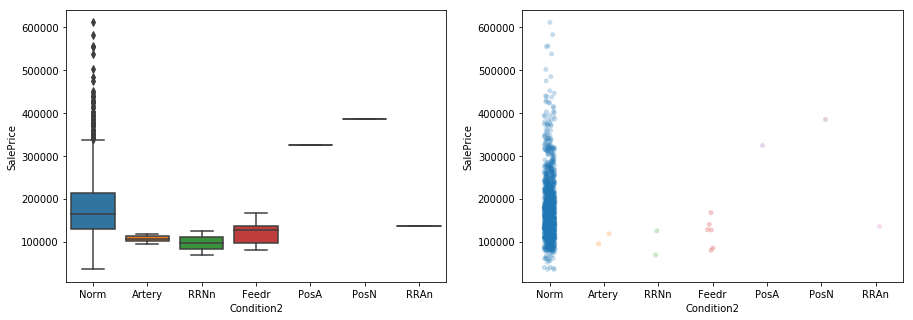

In [60]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Condition2", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Condition2", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


We can remove two `Condition` variables, because most data are normal group.

#### LandContour [x]

Flatness of the property.  
The same reason as just above variable. The feature would contribute little to the sale price value.

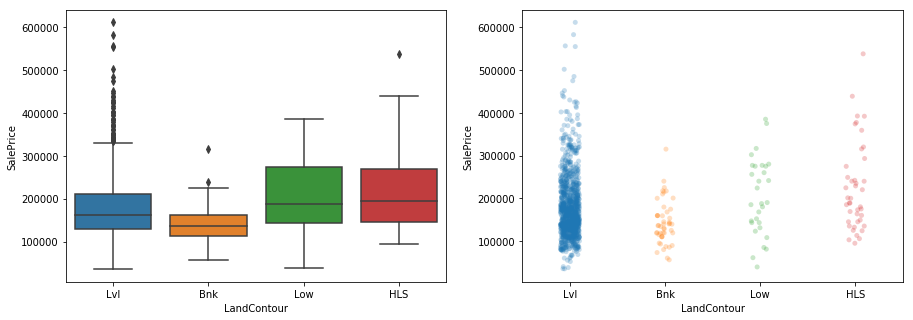

In [61]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="LandContour", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="LandContour", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### LandSlope [x]

Slope of property.  
The same reason as just above variable. The feature would contribute little to the sale price value.

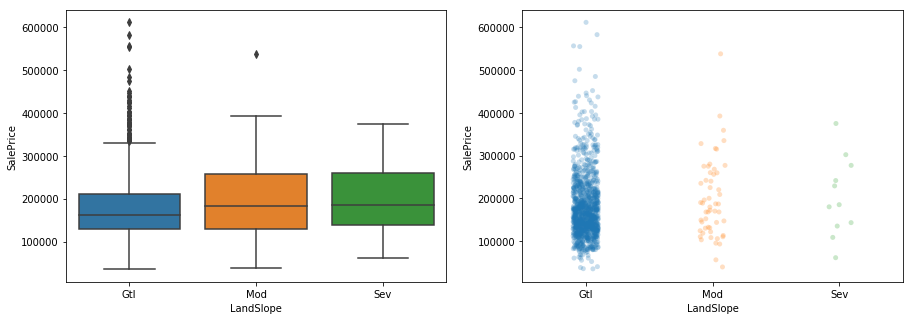

In [62]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="LandSlope", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="LandSlope", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### LotArea

Lot size in square feet.  
Except the outliner in the right hand side, LotArea affects the sale price which increases quickly when a house has huge lot size. In general, the area of a lot is smaller 50,000 ft<sup>2</sup>

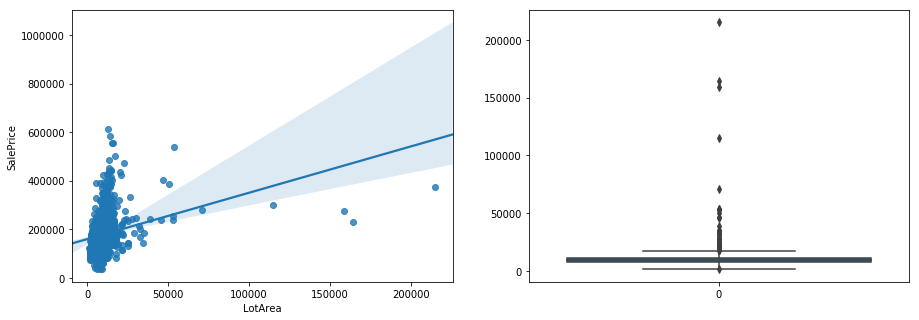

In [63]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="LotArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['LotArea']);


We believe that the `LotArea` will have high contribution on the sale price.  
The graph shows a few house with huge lot area, but the price is quite low, just around 200,000 with larger than 100,000 ft<sup>2</sup>  
The points which has greater than 100,000 ft<sup>2</sup> should be removed.

In [64]:
# show the outliers
df_train[(df_train['LotArea'] > 100000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,NaN,NA,Shed,500,6,2007,WD,Normal,277000,12.531776
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,NaN,NA,NA,0,6,2009,WD,Normal,375000,12.834684
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,NaN,NA,Shed,700,8,2008,WD,Normal,228950,12.341263
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,NaN,NA,NA,0,6,2007,WD,Normal,302000,12.618186


In [65]:
# remove the outliers
df_train = df_train.drop(df_train[(df_train['LotArea'] > 100000)].index)

#### LotShape [x]
General shape of property
- Reg: Regular: 
- IR1: Slightly irregular
- IR2: Moderately Irregular
- IR3: Irregular

Most of Lot has regular shape or slightly irregular shape while a houses which has irregular shape lot is irregular.

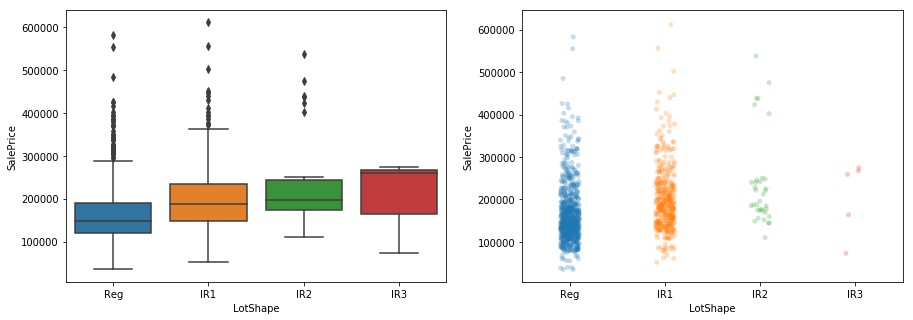

In [66]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="LotShape", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="LotShape", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### LotConfig [x]

Lot configuration.
- Inside: Inside lot
- Corner: Corner lot
- CulDSac: Cul-de-sac
- FR2: Frontage on 2 sides of property
- FR3: Frontage on 3 sides of property

The configuration of inside is most common value and the value of sale price was not impacted by this variable

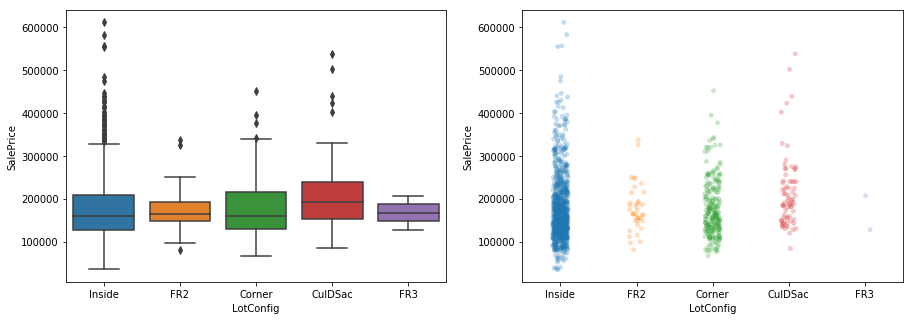

In [67]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="LotConfig", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="LotConfig", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


So there is no difference between groups, then remove these variables.

## 1.7 Access

#### Street [x]

Type of road access
- Grvl: Gravel	
- Pave: Paved

The value of Gravel is too obvious making the variable is not quite useful.

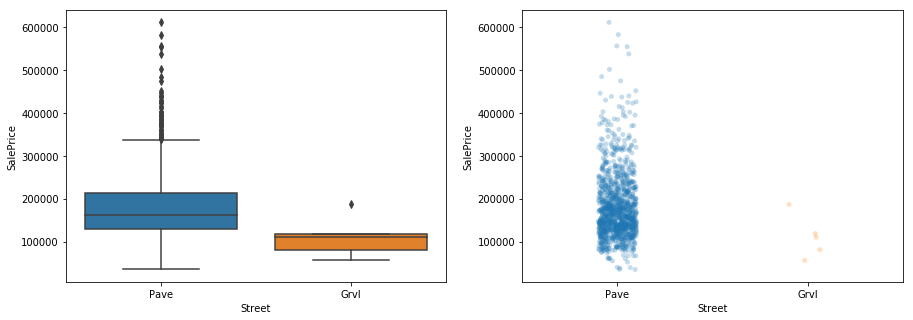

In [68]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Street", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Street", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### PavedDrive

Paved driveway.
- Y: Paved 
- P: Partial Pavement
- N: Dirt/Gravel


The value of Paved is too obvious making the variable is nearly useless.

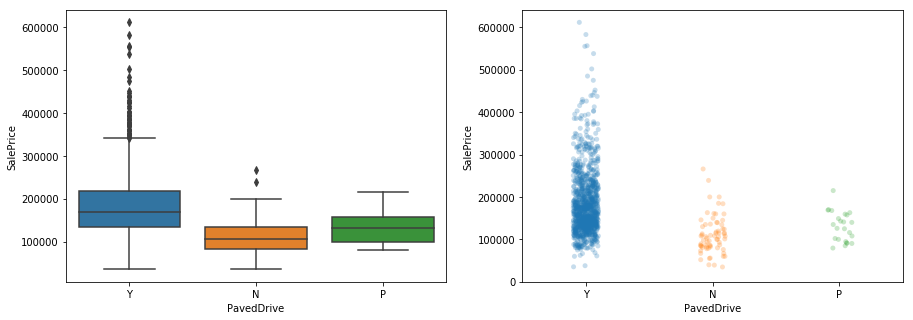

In [69]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="PavedDrive", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="PavedDrive", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


## 1.8 Utilities

#### Utilities [x]
Type of utilities available. 
- AllPub: All public Utilities (E,G,W,& S): 
- NoSewr: Electricity, Gas, and Water (Septic Tank)
- NoSeWa: Electricity and Gas Only
- ELO: Electricity only

Most data lie on `AllPub`, so remove this variable.

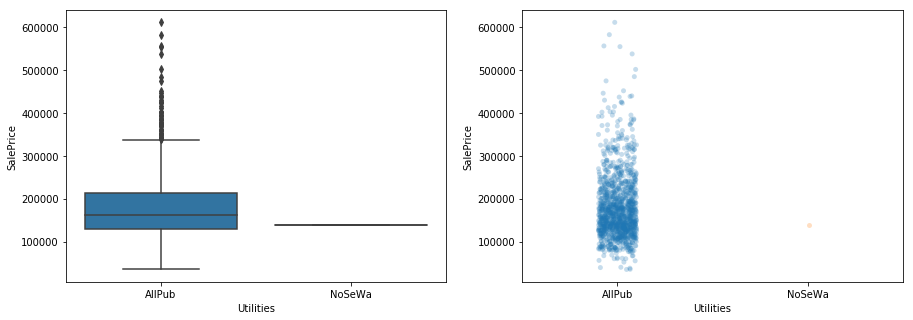

In [70]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Utilities", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Utilities", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### Heating [x]
Type of heating.
- Floor: Floor Furnace
- GasA: Gas forced warm air furnace
- GasW: Gas hot water or steam heat
- Grav: Gravity furnace: 
- OthW: Hot water or steam heat other than gas
- Wall: Wall furnace

The most common type of heating is GasA and the other types has very low frequency, so this variable should be removed.

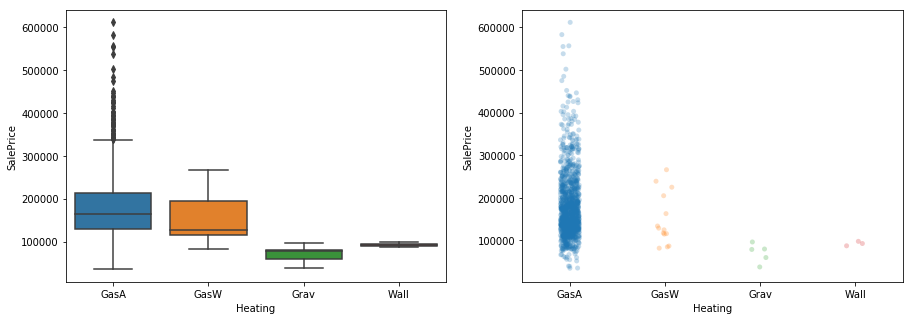

In [71]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Heating", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Heating", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### HeatingQC
Heating quality and condition
- Ex: Excellent
- Gd: Good
- TA: Average/Typical
- Fa: Fair
- Po: Poor

The graphs show that the data spreads around different value in the Heating Quality and Condition variable. The median of each value is quite different, so it is acceptable variable.

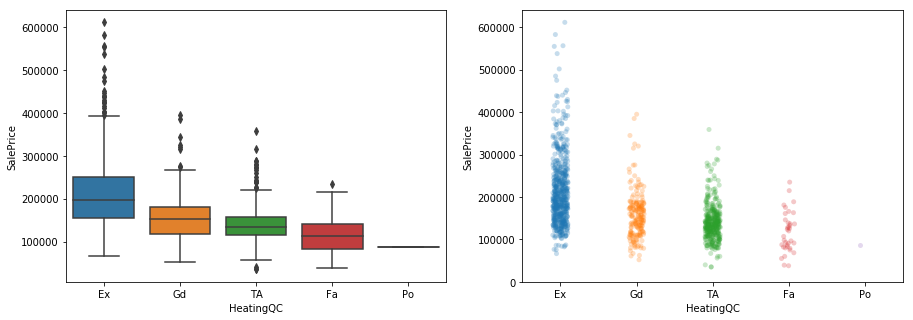

In [72]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="HeatingQC", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="HeatingQC", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### CentralAir

Central air conditioning.
- Y: Yes
- N: No

Most times are `yes`, so the variable is suggested to be removed because of obviousity.

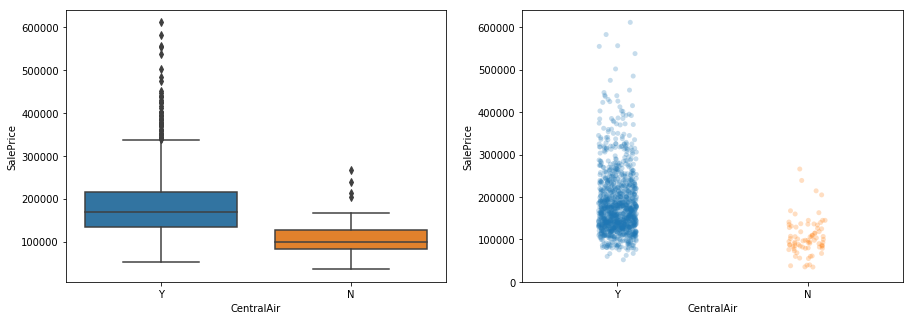

In [73]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="CentralAir", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="CentralAir", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### Electrical [x]

Electrical system.
- SBrkr: Standard Circuit Breakers & Romex
- FuseA: Fuse Box over 60 AMP and all Romex wiring (Average): 
- FuseF: 60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP: 60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix: Mixed

The popular electricity system is `SBrkr` and very few instances in other value. The variable is not useful.

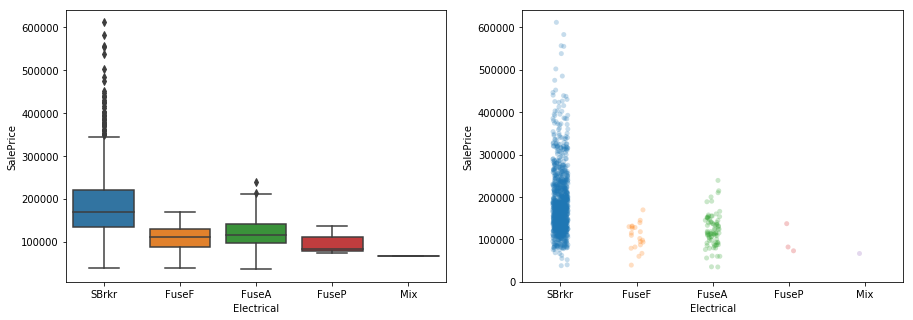

In [74]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Electrical", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Electrical", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### Fireplaces

Number of fireplaces.  
Nearly half of houses have fireplace and this variable highly impacts on the sale price.

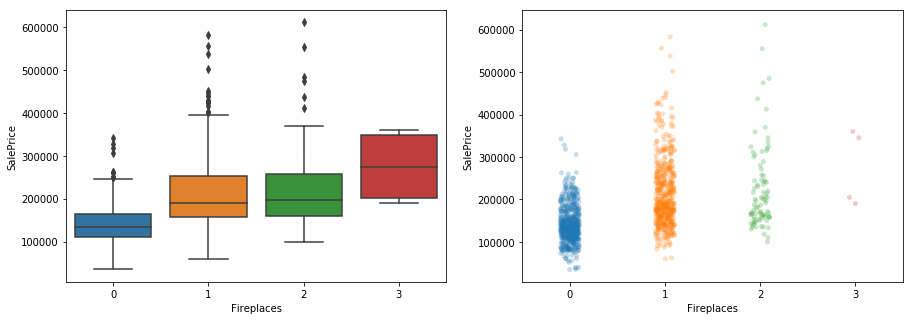

In [75]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Fireplaces", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Fireplaces", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### FireplaceQu

Fireplace quality.  
Although the houses which has no fireplaace has lower sale price, the influence of the quality of fireplace is not so high, but may be useful. 

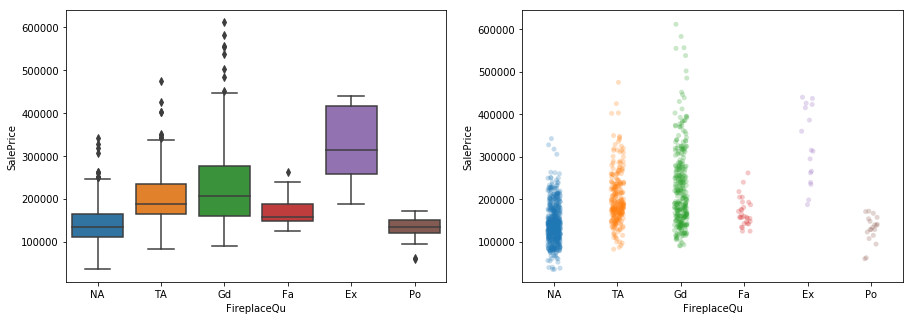

In [76]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="FireplaceQu", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


## 1.8 Sale Information

#### SaleType
Type of sale
- WD : Warranty Deed - Conventional
- CWD: Warranty Deed - Cash
- VWD: Warranty Deed - VA Loan
- New: Home just constructed and sold
- COD: Court Officer Deed/Estate
- Con: Contract 15% Down payment regular terms
- ConLw: Contract Low Down payment and low interest
- ConLI: Contract Low Interest
- ConLD: Contract Low Down
- Oth: Other

Most of houses were sold in Warranty Deed - Conventional, but the new home seems to have higher price in general.

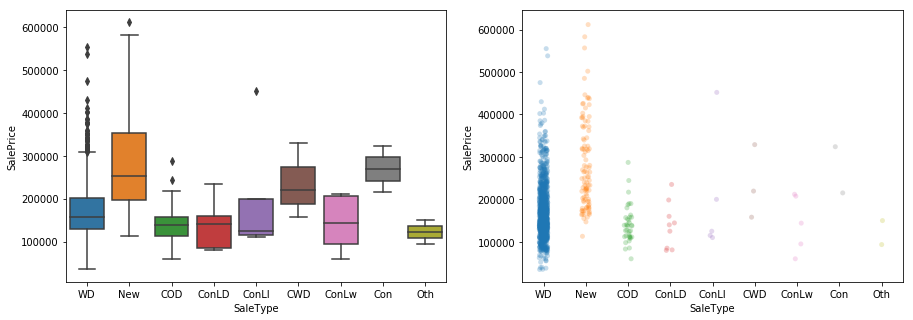

In [77]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="SaleType", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="SaleType", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### SaleCondition

Condition of sale.

The most frequent sale condition is Normal, so this variable is not quite useful.

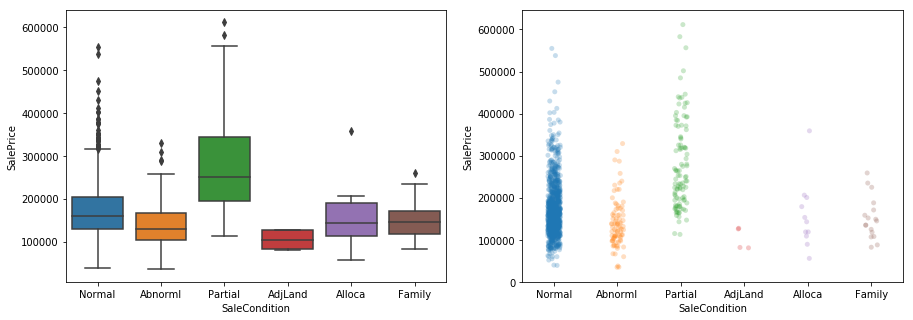

In [78]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="SaleCondition", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="SaleCondition", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### YrSold [x]

Year Sold.  
There are only 5 periods in the database. The distribution between classes is equal together. Thus, the year of sold has no contribute to the sale price.

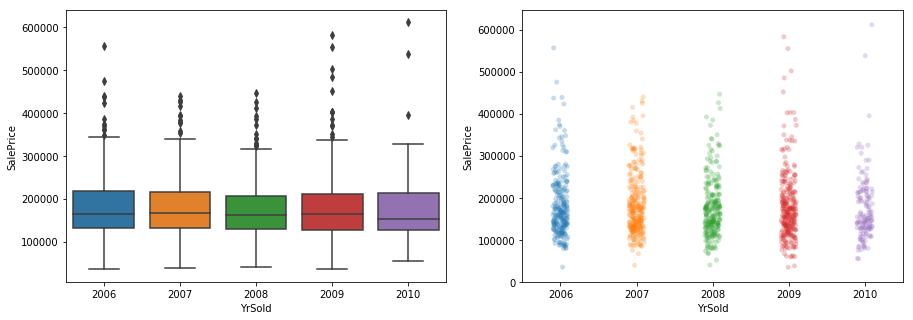

In [79]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="YrSold", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="YrSold", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### MoSold

Month Sold  
Though the variable seems like numeric, but it actually is categorical variable. There is no any specific month that has higher sale price to the other.

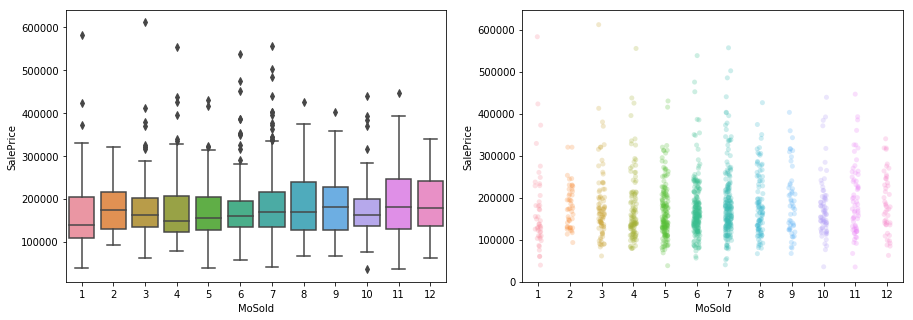

In [80]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="MoSold", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="MoSold", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


## 1.10 Miscellaneous [x]

#### MiscFeature

Miscellaneous feature not covered in other categories.
- Elev: Elevator
- Gar2: 2nd Garage (if not described in garage section)
- Othr: Other
- Shed: Shed (over 100 SF)
- TenC: Tennis Court
- NA: None

Most of sold houses has no additional feature, so this variable is removed.

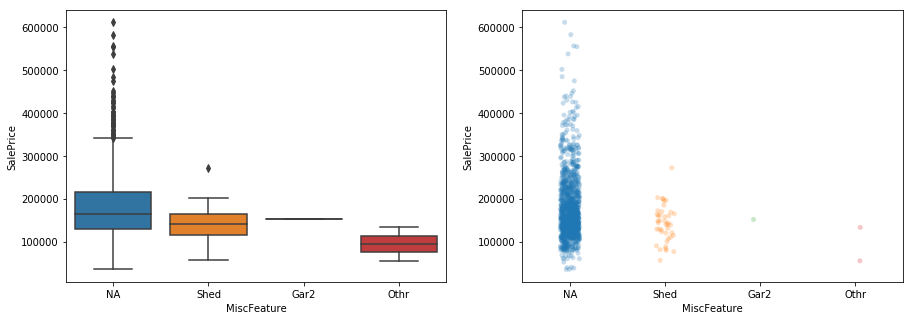

In [81]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="MiscFeature", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="MiscFeature", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


#### MiscVal

Value (in dollars) of miscellaneous feature.  
Same reason for this feature. Most values are zeros, so it contains little information.

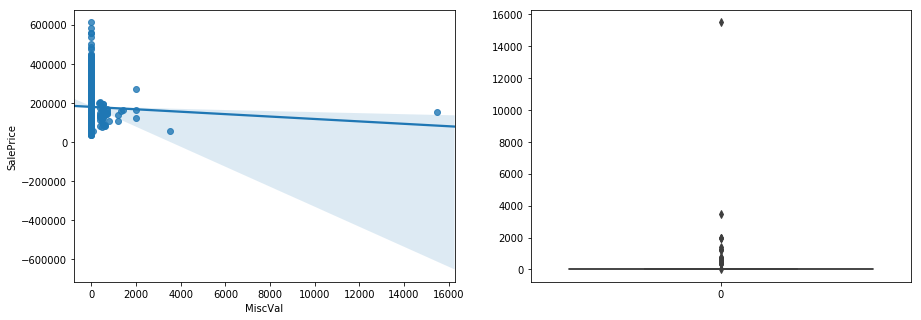

In [82]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="MiscVal", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['MiscVal']);


## Conclusion for feature selection

Based on extensive deep analysis of individual feature, we are able to reduce the number of features by removing the variables that are dominated by a single value or the target (sale price) has no significant difference in distinguished values.  
Indeed, from 79 feature at raw dataset, we select **37 features** and ready for next step. The kept variables are:

> BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF  
> 1stFlrSF, GrLivArea  
> BsmtFullBath, FullBath, HalfBath  
> BedroomAbvGr, KitchenQual, TotRmsAbvGrd  
> MSSubClass, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, Foundation  
> GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea  
> MSZoning, Neighborhood, LotArea, PavedDrive  
> HeatingQC, Fireplaces, FireplaceQu, CentralAir  
> MoSold, SaleType, SaleCond

During the analysis, we also removed 9 outliers using visual subjective method. That mean the training remains **1191 instances**.

# 2. Feature Transformation

Before diving into building models, the features has to be transformed to appropriate form. Almost, if not all, regressors were designed for numeric inputs, but the data contains string type, so they must be converted to integer.

Moreover, even a numeric type may not be suitable. Indeed,:
- if the variable has an order (ex: good, average, bad, etc.), so the their possible values should be converted to corresponding ordered numeric values (ex: 3, 2, 1).
- if the variable has no order, so dummy features will be created for each possible values. For instance, the Foundation feature can be either one of 3 values: concrete, stone or wood. Two variables are created: is_concrete and is_stone. Note that there are k - 1 features are enough and to avoid dependency.

Based on the description, the features are first categorized to ordinal, nominal and numeric variables, then we will transformed  them all to numeric values.

In [83]:
# ordial variables
ordinal_var = ['GarageFinish', 'PavedDrive', 'HeatingQC', 'CentralAir', 'FireplaceQu', 
               'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 
               'KitchenQual', 'OverallQual', 'OverallCond']

# nominal variables
nominal_var = ['GarageType', 'MSZoning', 'Neighborhood', 'SaleType', 'SaleCondition', 'MoSold', 
               'MSSubClass', 'HouseStyle', 'Foundation']

# numeric variables
numeric_var = ['GarageYrBlt', 'GarageCars', 'GarageArea', 'LotArea', 'Fireplaces', 
               'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 
               'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 
               'YearBuilt', 'YearRemodAdd']

# all variables
all_var = ordinal_var + nominal_var + numeric_var

# target variable - using the log transform
target_var = 'LogSalePrice'

We will select only the chosen variables.

In [84]:
# train data
df_train_x = df_train[all_var]
df_train_y = df_train[target_var]

# test data
df_test_x = df_test[all_var]

## 2.1 Ordinal variables

In [85]:
# Create mapping table

ordinal_mapping = {
    'GarageFinish': {
        'NA': 0,
        'Unf': 1,
        'RFn': 2,
        'Fin': 3
    },
    'PavedDrive': {
        'N': 0,
        'P': 1,
        'Y': 2
    },
    'HeatingQC': {
        'Po': 0,
        'Fa': 1,
        'TA': 2,
        'Gd': 3,
        'Ex': 4 
    },
    'CentralAir': {
        'N': 0,
        'Y': 1
    },
    'FireplaceQu': {
        'NA': 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    },
    'BsmtQual': {
        'NA': 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    }, 
    'BsmtExposure': {
        'NA': 0,
        'No': 1,
        'Mn': 2,
        'Av': 3,
        'Gd': 4
    }, 
    'BsmtFinType1': {
        'NA': 0,
        'Unf': 1,
        'LwQ': 2,
        'Rec': 3,
        'BLQ': 4,
        'ALQ': 5,
        'GLQ': 6
    }, 
    'KitchenQual': {
        'Po': 0,
        'Fa': 1,
        'TA': 2,
        'Gd': 3,
        'Ex': 4 
    }, 
    'OverallQual': {
        1: 0,
        2: 1,
        3: 2,
        4: 3,
        5: 4,
        6: 5,
        7: 6,
        8: 7,
        9: 8,
        10: 9
    }, 
    'OverallCond': {
        1: 0,
        2: 1,
        3: 2,
        4: 3,
        5: 4,
        6: 5,
        7: 6,
        8: 7,
        9: 8,
        10: 9
    }
}    

In [86]:
# transform ordinal variables
for ord_var in ordinal_var:
    df_train_x[ord_var] = df_train_x[ord_var].map(ordinal_mapping[ord_var])
    df_test_x[ord_var] = df_test_x[ord_var].map(ordinal_mapping[ord_var])

## 2.2 Norminal variables

In [87]:
# define categories type
categoricalTypes = {
    'GarageType': CategoricalDtype(["2Types", "Attchd", "Basment", "BuiltIn", "CarPort", "Detchd", "NA"]),
    'MSZoning': CategoricalDtype(["A", "C", "FV", "I", "RH", "RL", "RP", "RM"]),
    'Neighborhood': CategoricalDtype(["Blmngtn", "Blueste", "BrDale", "BrkSide", "ClearCr", "CollgCr", "Crawfor",
                                     "Edwards", "Gilbert","IDOTRR", "MeadowV","Mitchel", "Names",
                                     "NoRidge","NPkVill","NridgHt","NWAmes","OldTown","SWISU","Sawyer","SawyerW",
                                     "Somerst","StoneBr","Timber","Veenker"]),
    'SaleType': CategoricalDtype(["WD", "CWD", "VWD", "New", "COD", "Con", "ConLw", "ConLI", "ConLD", "Oth"]),
    'SaleCondition': CategoricalDtype(["Normal", "Abnorml", "AdjLand", "Alloca", "Family", "Partial"]),
    'MoSold': CategoricalDtype([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
    'MSSubClass': CategoricalDtype([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]), 
    'HouseStyle': CategoricalDtype(["1Story", "1.5Fin", "1.5Unf", "2Story", "2.5Fin", "2.5Unf", "SFoyer", "SLvl"]),
    'Foundation': CategoricalDtype(["BrkTil", "CBlock", "PConc", "Slab", "Stone", "Wood"])
}

df_train_x = df_train_x.astype(categoricalTypes)
df_test_x = df_test_x.astype(categoricalTypes)

In [88]:
# transform nominal variables using dummy encoding
df_train_x = pd.get_dummies(df_train_x, columns = nominal_var, prefix=nominal_var, drop_first=True)
df_test_x = pd.get_dummies(df_test_x, columns = nominal_var, prefix=nominal_var, drop_first=True)

# 3 Building Models

In this step, the data is prepared and ready to tranning using various algorithms. In this section, we first try to use some simple algorithms and then later, we will improve the performance by more advanced methods.

Since most of algorithm has some hyperparameters, we will try to search for the best hyperparameters. In addition, since the size of our dataset is quite small, we will use cross-validation technique to obtains the best hyperparamters.

## 3.1 Prepare data for simple validation

The training data are splitted into actual training data and validation data. With this two data sets, we can evaluate some simple approach to this problem.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import linear_model
import xgboost as xgb

X_train, X_val, y_train, y_val = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=123)

## 3.2. Ridge Regression

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. The data have many variables, so there is a high probability of multicollinearity, so this model is applied first.

In ordinary least square, the regression coefficients are estimated as $\hat{W}=(X'X)^{-1}X'Y$. The ridge regression add small value k to the diagonal elements of the correlation matrix, so becomes $\hat{W}=(X'X + kI)^{-1}X'Y$. That will shrink the large coefficients in the model.

In [90]:
# run ridge regression with cross validation to find the best alpha
model_ridge = linear_model.RidgeCV(alphas=np.arange(0.1, 200, 0.1))
model_ridge.fit(X_train, y_train)
print('Best alpha for Rigde model:', model_ridge.alpha_)

Best alpha for Rigde model: 7.9


> RidgeCV run cross-validation and searched for the best hyperparameter alpha. The best alpha is **7.9**.

In [91]:
# predict on validation data
y_val_pre = model_ridge.predict(X_val)

# get RMSE
print('RMSE of validation data:', np.sqrt(metrics.mean_squared_error(y_val_pre, y_val)))

RMSE of validation data: 0.10850084206315243


## 3.3 LARS Lasso Regression

Just like [step-wise](https://en.wikipedia.org/wiki/Stepwise_regression) method, Lasso Regression try to select as few variables as possible that covariate to the reponse. The LARS Lasso also prevents the overfitting by forcing sum of the coefficients to be less than a fixed number and force certain of coefficient to zeros for simplier models.

In [92]:
model_lasso = linear_model.LassoLarsCV()
model_lasso.fit(X_train, y_train)
print('Best alpha for Lasso model:', model_lasso.alpha_)

Best alpha for Lasso model: 0.0001678814665479999


> LassoLarsCV run cross-validation and searched for the best hyperparameter alpha. The best alpha is **0.0001678814665479999**.

In [93]:
# predict on validation data
y_val_pre = model_lasso.predict(X_val)

# get RMSE
print('RMSE of validation data:', np.sqrt(metrics.mean_squared_error(y_val_pre, y_val)))

RMSE of validation data: 0.11029245400853


## 3.4 Elastic Net Regression

Elastic Net Regression try to combine the idea of both Ridge Regreesion and Lasso Regression

In [94]:
model_elas = linear_model.ElasticNetCV(l1_ratio=np.concatenate((np.arange(0.1, 0.9, 0.1), np.arange(0.8, 1.01, 0.01))))
model_elas.fit(X_train, y_train)
print('Best alpha param for Elastic Net model:', model_elas.alpha_)
print('Best l1_ratio param for Elastic Net model:', model_elas.l1_ratio_)

Best alpha param for Elastic Net model: 0.8368026708376423
Best l1_ratio param for Elastic Net model: 1.0000000000000002


> Similarly, the algorithm will search for the best hyperparamters. In Elastic Net Regression, we need 2 paramters:
> - alpha: **0.8368026708376423**
> - l1_ratio: **1.0**

In [95]:
# predict on validation data
y_val_pre = model_elas.predict(X_val)

# get RMSE
print('RMSE of validation data:', np.sqrt(metrics.mean_squared_error(y_val_pre, y_val)))

RMSE of validation data: 0.1604353467832097


## 3.5 Random Forest Regression

Random Forest contains multiple of decision tree which is build from subset of the training data. The prediction is combine the results of the these trees, so this is an ensemble method. The Random Forest is designed for avoiding overfitting.

In [96]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators': np.arange(50, 500, 50), 'max_features': ['auto', 'sqrt', 'log2'], 
         'min_samples_leaf': np.arange(50, 500, 50)}

model_rf = GridSearchCV(RandomForestRegressor(random_state=42), params, n_jobs=-1)
model_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]), 'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
model_rf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 50, 'n_estimators': 450}

> The best hyperparameters for Random Forest are:
> - max_features: **auto**
> - n_estimators: **450**
> - min_samples_leaf: **50**

In [98]:
# predict on validation data
y_val_pre = model_rf.predict(X_val)

# get RMSE
print('RMSE of validation data:', np.sqrt(metrics.mean_squared_error(y_val_pre, y_val)))

RMSE of validation data: 0.1887028796611751


## 3.6 Gradient Boosting Model

Gradient Boosting is a form of ensemble method that combines multiple weak learner together to produce the final result. The boosting optimised the loss function over the iteration process. In each iteration, a new learner is trained in which emphasizes on the points in the negative gradient direction.

In [99]:
# import xgboost as xgb

# # fit gradient boosting model with default params
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

print (model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [100]:
# # predict on validation data
y_val_pre = model.predict(X_val)

# # get RMSE
print('RMSE of validation data:', np.sqrt(metrics.mean_squared_error(y_val_pre, y_val)))

RMSE of validation data: 0.11835625674629448


In [101]:
# # cross validation with 5 folds
scores = cross_val_score(model, df_train_x, df_train_y, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([0.12161167, 0.12030888, 0.14109941, 0.11452144, 0.12905331])

In [102]:
params = {'n_estimators': np.arange(50, 550, 100), 
          'reg_alpha': np.linspace(0.1, 1, 5),
          'reg_lambda': np.linspace(0.1, 1, 5), 
          'colsample_bytree': np.linspace(0.1, 1, 5), 
          'colsample_bylevel': np.linspace(0.1, 1, 5),
          'scale_pos_weight': np.linspace(0.1, 1, 5)}
model_xgb = GridSearchCV(xgb.XGBRegressor(), params, scoring = 'neg_mean_squared_error', n_jobs=-1)
model_xgb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'colsample_bytree': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), 'n_estimators': array([ 50, 150, 250, 350, 450]), 'scale_pos_weight': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), 'colsample_bylevel': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), 'reg_alpha': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), 'reg_lambda': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [103]:
model_xgb.best_params_

{'colsample_bylevel': 0.1,
 'colsample_bytree': 0.55,
 'n_estimators': 350,
 'reg_alpha': 0.1,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1.0}

> The best hyperparameter for XGBoost are:
> - colsample_bylevel: **0.1**,
> - colsample_bytree: **0.55**,
> - n_estimators: **350**,
> - reg_alpha: **0.1**,
> - reg_lambda: **1.0**,
> - scale_pos_weight: **1.0**}

In [104]:
# predict on validation data
y_val_pre = model_xgb.predict(X_val)

# get RMSE
print('RMSE of validation data:', np.sqrt(metrics.mean_squared_error(y_val_pre, y_val)))

RMSE of validation data: 0.11783754136475125


## Conclusion



Generally, we can see that the learners from Rigde Regressor, LARS Lasso Regressor, XGBoosting produces the result (RMSE) quite close together, around 0.11. Random Forest and Elastic Regressor are a bit worse than the other, over 0.15.

# 4 Stacking Method
After trying many simple models above, we can use a more advanced method called "stacking". Stacking (also called meta ensembling) is a model ensembling technique used to combine information from multiple predictive models to generate a new model.
In stacking, the predicted results of base models are used again to predict a final result by using a meta model. In this problem, because XGB produce a best result, we use it as meta model.  
  
First, we define a stacking regressor with 5 base models including Ridge, Lasso, Elastic Net, Random Forest and Gradient Boosting; and a Gradient Boosting meta model. 

## 4.1 Setting Up
In order to build the stacks for Stacking Method. This subsection will set up all above simple regressor models with their best hyperparameters.

In [105]:
# Ridge Regressor
model_ridge_best = linear_model.Ridge(alpha=7.9)

# LARS Lasso Regressor
model_lasso_best = linear_model.LassoLars(alpha=0.0001678814665479999)

# Elastic Net Regressor
model_elas_best = linear_model.ElasticNet(l1_ratio=1.0, alpha=0.8368026708376423)

# Random Forest Regressor
model_rf_best = RandomForestRegressor(random_state=42, max_features='auto', n_estimators=450, min_samples_leaf=50)

# XGBoost Regressor
model_xgb_best = xgb.XGBRegressor(colsample_bylevel=0.1,
       colsample_bytree=0.55, n_estimators=350,
       reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0)

## 4.2 Building The Model

In [106]:
from mlxtend.regressor import StackingRegressor

# create stacking regressor with base models in the previous section and an XGB as meta model
model_stacking = StackingRegressor(regressors=[model_ridge_best, model_lasso_best, model_elas_best,
                                               model_rf_best, model_xgb_best], meta_regressor=xgb.XGBRegressor())

The base models are already fine-tuned with grid search. Then, we need to fine-tune the meta model.

In [107]:
# apply gridsearch for meta model
params = {'meta-xgbregressor__n_estimators': [100, 200, 300], 
          'meta-xgbregressor__reg_alpha': np.linspace(0.01, 1, 5),
          'meta-xgbregressor__reg_lambda': np.linspace(0.01, 1, 5), 
          'meta-xgbregressor__colsample_bytree': np.linspace(0.01, 1, 5), 
          'meta-xgbregressor__colsample_bylevel': np.linspace(0.01, 1, 5),
          'meta-xgbregressor__scale_pos_weight': np.linspace(0.01, 1, 5)}

grid = GridSearchCV(estimator=model_stacking, param_grid=params,  cv=5,  refit=True, n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='re..., seed=None,
       silent=True, subsample=1)],
         store_train_meta_features=False, verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'meta-xgbregressor__n_estimators': [100, 200, 300], 'meta-xgbregressor__reg_lambda': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]), 'meta-xgbregressor__scale_pos_weight': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]), 'meta-xgbregressor__colsample_bylevel': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]), 'meta-xgbregressor__colsample_bytree': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]), 'meta-xgbregressor__reg_alpha': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])},
   

In [108]:
grid.best_params_

{'meta-xgbregressor__colsample_bylevel': 0.7525,
 'meta-xgbregressor__colsample_bytree': 0.7525,
 'meta-xgbregressor__n_estimators': 100,
 'meta-xgbregressor__reg_alpha': 1.0,
 'meta-xgbregressor__reg_lambda': 0.7525,
 'meta-xgbregressor__scale_pos_weight': 1.0}

> The grid search result is:  
> {'meta-xgbregressor__colsample_bylevel': 0.7525,  
> 'meta-xgbregressor__colsample_bytree': 0.7525,  
> 'meta-xgbregressor__n_estimators': 100,  
> 'meta-xgbregressor__reg_alpha': 1.0,  
> 'meta-xgbregressor__reg_lambda': 0.7525,  
> 'meta-xgbregressor__scale_pos_weight': 1.0}  

Now we can predict the validation data and get the RMSE.

In [109]:
# predict on validation data
y_val_pre = grid.predict(X_val)

# get RMSE
print('RMSE of validation data:', np.sqrt(metrics.mean_squared_error(y_val_pre, y_val)))

RMSE of validation data: 0.11031904416213485


# 5. Predicting Test Data

Finally, we use the stacking model to predict test data.

In [110]:
test_pred = grid.predict(df_test_x)

Then, saving the predicted values and making submission file.

In [113]:
# dataframe for saving predicted results
res = pd.DataFrame()

# Id and Prediction (the exp - 1 to return the price instead of log price)
res['Id'] = df_test["Id"]
res['SalePrice'] = np.expm1(test_pred)

# create submission file
res.to_csv('aml-challenge-submission-user23.csv', index=False)